# Séries temporais em bases financeiras - ARIMA


- PREVISOES DOS PREÇOS DAS  AÇÕES

In [ ]:
#https://colab.research.google.com/drive/1d4-nTueHYTYDMjJW4Z2Lyxe2eSRoUgsd?usp=sharing#scrollTo=mYXI93N6uWo-

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
#preparar a base de dados



dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/EI.EXPERT/Python paraFinanças:AnálisedeDadoseMachineLearning/Bases de Dados/acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA'])

In [ ]:
dataset.info

<bound method DataFrame.info of                  BOVA
Date                 
2015-01-02  47.259998
2015-01-05  46.320000
2015-01-06  46.580002
2015-01-07  48.150002
2015-01-08  48.509998
...               ...
2020-10-27  95.800003
2020-10-28  92.430000
2020-10-29  92.910004
2020-10-30  90.660004
2020-11-03  92.410004

[1446 rows x 1 columns]>

In [ ]:
#Criar uma nova variavel 

time_series = dataset['BOVA']

In [ ]:
time_series

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 1446, dtype: float64

EXPLORAÇÃO DA SÉRIE TEMPORAL 

In [ ]:
#valor da bolsa em janeiro de 2015 do dia 2
time_series[0]

47.2599983215332

In [ ]:
time_series['2015-01-08']

48.5099983215332

In [ ]:
#intervalos

#os primeiros 10 dias 

time_series['2015-01-01': '2015-01-10']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
2015-01-09    47.529999
Name: BOVA, dtype: float64

In [ ]:
#buscar todos os registro por umadata expecifica

time_series[:'2015-07-31']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-07-27    47.349998
2015-07-28    48.180000
2015-07-29    48.740002
2015-07-30    48.430000
2015-07-31    49.369999
Name: BOVA, Length: 144, dtype: float64

In [ ]:
#Buscar os dados de um ano expecifico 

time_series['2015']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

In [ ]:
#vamos pegar a maior data

time_series.index.max()

Timestamp('2020-11-03 00:00:00')

In [ ]:
#menor data

time_series.index.min()

Timestamp('2015-01-02 00:00:00')

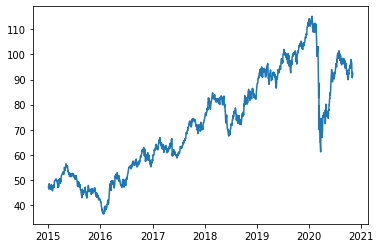

In [ ]:
plt.plot(time_series)

In [ ]:
figura = px.line(title='Hitórico do preços das ações')
figura.add_scatter(x = time_series.index, y = time_series)

In [ ]:
#subdatime frame

#pegar os dados de ano.
time_series_datas = time_series['2005-01-01' : '2015-12-01']

In [ ]:
time_series_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-11-25    45.410000
2015-11-26    45.650002
2015-11-27    44.590000
2015-11-30    43.700001
2015-12-01    43.529999
Name: BOVA, Length: 227, dtype: float64

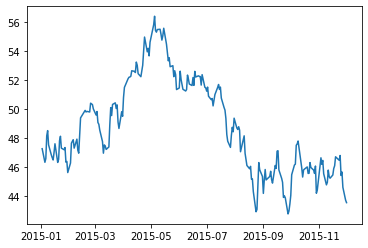

In [ ]:
#grafico 

#GERAR O GRAFICO DO ANO ANALISADO

plt.plot(time_series_datas);

DECOMPOSIÇÃO DA SERIE TEMPORAL 

In [ ]:
len(time_series) / 2

723.0

In [ ]:
decomposicao = seasonal_decompose(time_series, period= 723)

In [ ]:
decomposicao

In [ ]:
tendencia  = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

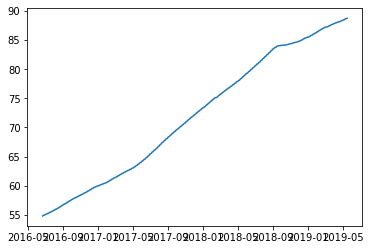

In [ ]:
#Grafico

plt.plot(tendencia);

#Observamos que a tendência é de crescimento.

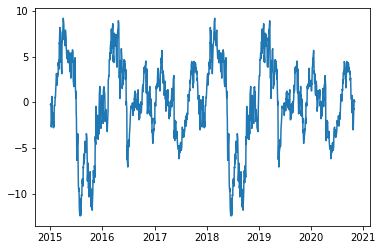

In [ ]:
plt.plot(sazonal);

#vamos pegar a sazonalidade, exemplo quando umproduto foi vendido em um determinado mês.

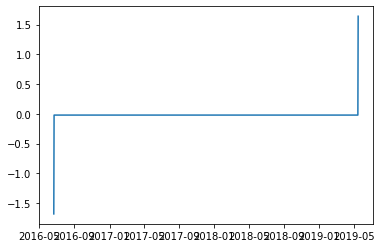

In [ ]:
plt.plot(aleatorio);

#são os dados que não da para aser explicado , dados residuais. 

PREVISÕES ARIMA



In [ ]:
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [ ]:
modelo

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:

#Parâmetro  P, Q e D
modelo.order

(4, 1, 4)

In [ ]:
# O modelo de previsão foi criado 

previsoes = modelo.predict(n_periods=90)

In [ ]:
previsoes

array([92.06040543, 91.65955205, 91.68701293, 90.8491663 , 91.06300945,
       90.26532904, 90.40839673, 90.00106925, 89.93690554, 89.99878804,
       89.77377018, 90.13962912, 89.91466341, 90.32026045, 90.24460551,
       90.48548541, 90.60221361, 90.61966236, 90.85324312, 90.72101018,
       90.93812553, 90.78325798, 90.87703034, 90.79503927, 90.73961426,
       90.75153715, 90.60180531, 90.66525576, 90.51268025, 90.56590554,
       90.48364523, 90.48864938, 90.49802807, 90.45815386, 90.52985907,
       90.47808018, 90.55958851, 90.53156239, 90.5800275 , 90.5913893 ,
       90.59314894, 90.63349803, 90.60310728, 90.64661688, 90.61112656,
       90.63411095, 90.61489301, 90.60877602, 90.61143082, 90.58467932,
       90.60044369, 90.57066356, 90.5855091 , 90.56816856, 90.57246937,
       90.57318666, 90.56632199, 90.58015079, 90.56868461, 90.5852095 ,
       90.57727698, 90.58741866, 90.58747874, 90.58792703, 90.59484053,
       90.58829248, 90.59708758, 90.58919513, 90.59468672, 90.59

Gráficos das Previsões

In [ ]:
len(time_series)

1446

In [ ]:
treinamento = time_series[:1081]
treinamento.shape

(1081,)

In [ ]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-10 00:00:00'))

In [ ]:
teste = time_series[1081:]
teste.shape

(365,)

In [ ]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-13 00:00:00'), Timestamp('2020-11-03 00:00:00'))

In [ ]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [ ]:
teste.index

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-03'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=365), index=teste.index)
previsoes.columns = ['Previsoes'] #Renomear a coluna

previsoes

,Previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381
2019-05-15,91.040707
2019-05-16,91.095342
2019-05-17,91.144594
...,...
2020-10-27,105.575508
2020-10-28,105.616004
2020-10-29,105.656500


In [ ]:
teste

Date
2019-05-13    88.309998
2019-05-14    88.760002
2019-05-15    87.870003
2019-05-16    86.559998
2019-05-17    86.739998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 365, dtype: float64

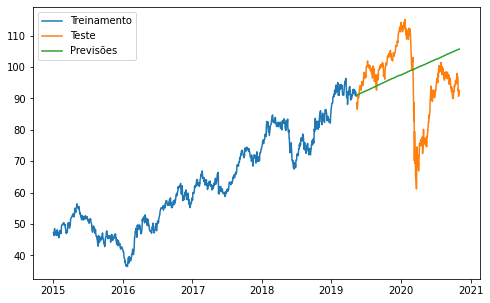

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')#previsoes 
plt.legend();

# a linha verde no grafico é a linha de tedencia, no meu caso é de subida 


AVALIAÇÃO ARIMA

In [ ]:
#FAZER A SUBTRAÇÃO DOS VALORES DE TESTE COM OS VALORES REAIS 

teste[0:2]

Date
2019-05-13    88.309998
2019-05-14    88.760002
Name: BOVA, dtype: float64

In [ ]:
previsoes[0:2]

,Previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381


In [ ]:
#Temos a subtração dos valores reais 
sum(abs(teste - previsoes['Previsoes']) / len(teste))

10.260835830334681

In [ ]:
#previsao do preço desse algoritmo , podemos errar 10 reais para cima ou para baixo

In [ ]:
#PODEMOS UTILIZAR A BIBLIOTECA SKLEARN PARA TERMOS O MESMO RESULTADO DOS DADOS ACIMA. 

from sklearn.metrics import mean_absolute_error


In [ ]:
mean_absolute_error(teste ,previsoes)

10.260835830334681

-------------------

SÉRIES TEMPORAIS EM BASE FINANCEIA- FACEBOOK PROPHET

In [ ]:
#Boa para usar quando tem uma base de dados grandes

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/EI.EXPERT/Python paraFinanças:AnálisedeDadoseMachineLearning/Bases de Dados/acoes.csv', usecols = ['Date', 'BOVA'])
dataset

,Date,BOVA
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


In [ ]:
#Renomear as colunas, por padrão do facebook devemos renomear as colunas


dataset = dataset[['Date','BOVA']].rename(columns = {'Date':'ds', 'BOVA':'y'})
dataset


,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


CONTRUÇÃO DO MODELO DE PREVISÃO 

In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo.make_future_dataframe(periods=90)#90 datas para frente
previsoes = modelo.predict(futuro)

In [ ]:
previsoes.head()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,48.991425,43.302811,57.986257,48.991425,48.991425,1.835024,1.835024,1.835024,0.401428,0.401428,0.401428,1.433596,1.433596,1.433596,0.0,0.0,0.0,50.826449
1,2015-01-05,49.018699,44.052494,58.740772,49.018699,49.018699,2.198627,2.198627,2.198627,0.342181,0.342181,0.342181,1.856447,1.856447,1.856447,0.0,0.0,0.0,51.217327
2,2015-01-06,49.027791,44.210180,58.133837,49.027791,49.027791,2.386577,2.386577,2.386577,0.389818,0.389818,0.389818,1.996759,1.996759,1.996759,0.0,0.0,0.0,51.414368
3,2015-01-07,49.036883,44.104817,59.428656,49.036883,49.036883,2.492839,2.492839,2.492839,0.359332,0.359332,0.359332,2.133507,2.133507,2.133507,0.0,0.0,0.0,51.529722
4,2015-01-08,49.045974,44.597714,58.718862,49.045974,49.045974,2.661502,2.661502,2.661502,0.396597,0.396597,0.396597,2.264905,2.264905,2.264905,0.0,0.0,0.0,51.707476



A primeira data é 02/01/2015, previsoes para base de dados inteira e para anteriores
 - Temos os valores de tedencia , valores minímo, valores maxímo
 - Visualização semanalmente e anualmente.
 - yhat é a previsão dos preços das ações

In [ ]:
len(dataset), len(previsoes)

#A base de dados original tem 1446  e a base de previsão, temos 1536

(1446, 1536)

In [ ]:
len(previsoes) - len(dataset)

#Temos exatamente os 90 periodos relacionados. desde 2015 até a ultima data

90

In [ ]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1446,2020-11-04,90.226469,85.369493,99.754399,90.226469,90.226469,2.341880,2.341880,2.341880,0.359332,0.359332,0.359332,1.982549,1.982549,1.982549,0.0,0.0,0.0,92.568350
1447,2020-11-05,90.204724,84.905054,99.424689,90.204724,90.204724,2.245200,2.245200,2.245200,0.396597,0.396597,0.396597,1.848603,1.848603,1.848603,0.0,0.0,0.0,92.449925
1448,2020-11-06,90.182980,85.212911,99.902088,90.182980,90.182980,2.119374,2.119374,2.119374,0.401428,0.401428,0.401428,1.717946,1.717946,1.717946,0.0,0.0,0.0,92.302354
1449,2020-11-07,90.161235,83.636335,98.298178,90.161235,90.161235,0.648184,0.648184,0.648184,-0.944678,-0.944678,-0.944678,1.592862,1.592862,1.592862,0.0,0.0,0.0,90.809419
1450,2020-11-08,90.139490,83.748877,97.834876,90.139490,90.139490,0.530774,0.530774,0.530774,-0.944678,-0.944678,-0.944678,1.475452,1.475452,1.475452,0.0,0.0,0.0,90.670264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-01-28,88.378164,84.437379,98.925167,87.640342,89.257483,3.402828,3.402828,3.402828,0.396597,0.396597,0.396597,3.006231,3.006231,3.006231,0.0,0.0,0.0,91.780992
1532,2021-01-29,88.356420,84.384386,98.956023,87.602829,89.265406,3.408446,3.408446,3.408446,0.401428,0.401428,0.401428,3.007017,3.007017,3.007017,0.0,0.0,0.0,91.764865
1533,2021-01-30,88.334675,83.106365,98.188356,87.566243,89.269437,2.069184,2.069184,2.069184,-0.944678,-0.944678,-0.944678,3.013862,3.013862,3.013862,0.0,0.0,0.0,90.403858
1534,2021-01-31,88.312930,82.713729,98.113381,87.534720,89.261990,2.082822,2.082822,2.082822,-0.944678,-0.944678,-0.944678,3.027501,3.027501,3.027501,0.0,0.0,0.0,90.395753


GRAFÍCO DE Previsões

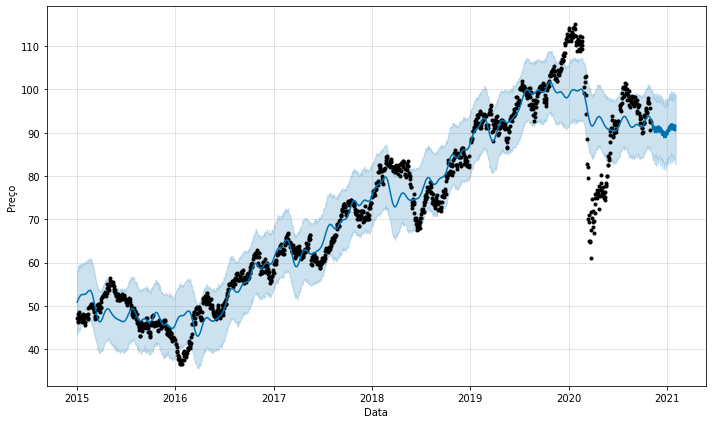

In [ ]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

A linha preta são os valores reais e a linha azul foi a previsão do modelo.

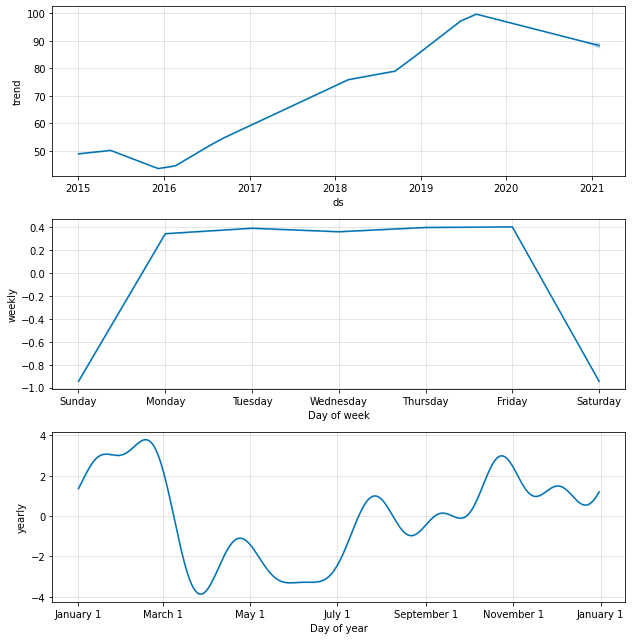

In [ ]:
modelo.plot_components(previsoes);

grafico de tendência, grafico semanal, grafico anual 

In [ ]:
#Grafico Dinâmico

from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo, previsoes)

Esse grafico da para selecionar a semana e o ano. tem o comparativo do preço real e da previsão.

E no final do grafíco com a cor azul forte, temos os valores de fato que foi feita a previsão.  

In [ ]:
plot_components_plotly(modelo, previsoes)

AVALIAÇÃO DO MODELO 

In [ ]:
teste.shape

(365,)

In [ ]:
teste.tail()

Date
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, dtype: float64

In [ ]:
pred = modelo.make_future_dataframe(periods=0)#colocando o valor 0 , vamos prever tudo que tem dentro da base de dados.
# ou seja até a data de atual do lançamento.
previsoes = modelo.predict(pred)

In [ ]:
previsoes.shape

(1446, 19)

In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,90.400427,85.938015,100.055704,90.400427,90.400427,3.266904,3.266904,3.266904,0.389818,0.389818,0.389818,2.877086,2.877086,2.877086,0.0,0.0,0.0,93.667331
1442,2020-10-28,90.378683,86.550857,100.751738,90.378683,90.378683,3.163925,3.163925,3.163925,0.359332,0.359332,0.359332,2.804593,2.804593,2.804593,0.0,0.0,0.0,93.542607
1443,2020-10-29,90.356938,86.568681,100.399821,90.356938,90.356938,3.113158,3.113158,3.113158,0.396597,0.396597,0.396597,2.716561,2.716561,2.716561,0.0,0.0,0.0,93.470096
1444,2020-10-30,90.335193,86.285456,100.242085,90.335193,90.335193,3.016340,3.016340,3.016340,0.401428,0.401428,0.401428,2.614911,2.614911,2.614911,0.0,0.0,0.0,93.351533
1445,2020-11-03,90.248214,85.575957,100.132580,90.248214,90.248214,2.507178,2.507178,2.507178,0.389818,0.389818,0.389818,2.117360,2.117360,2.117360,0.0,0.0,0.0,92.755392


In [ ]:
previsoes = previsoes['yhat'].tail(365)

In [ ]:
previsoes

1081    92.374527
1082    92.395009
1083    92.343171
1084    92.365431
1085    92.362015
          ...    
1441    93.667331
1442    93.542607
1443    93.470096
1444    93.351533
1445    92.755392
Name: yhat, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste, previsoes)

6.330108237081639

Temos um erro de 6.33 , que dizer que vamos ter um erro em media de R$ 6.33 reais 

O algoritmo do facebook foi mais preciso que o Arima, então vamos fazer as previsoes com o primeiro algoritmo.

MACCHINE LEARNING EM 
 - Análise exploratória e tratamento dos dados
 - Previsão se a empresa é boa. média ou ruim para investir a longo prazo 
 - Importância das características
 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Classificação de empresas com machine learning

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
- Empresas com indisponibilidade de informações 
ficaram com seus respectivos campos vazios
- **Atributo situação (classe)**: este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10 

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/EI.EXPERT/Python paraFinanças:AnálisedeDadoseMachineLearning/Bases de Dados/BD Completo.xlsx')

In [ ]:
dataset.shape

(377, 70)

In [ ]:
dataset.head()

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,EV/EBITDA,P/VPA,DPA,Dividend Yield,Payout,Margem Segurança,Rec. Liquida,Luc. Liquido,Luc. Liq * NR,Resultado Bruto,Margem Bruta,EBIT,D&A,EBITDA,Margem EBITDA,Res. Financeiro,Margem Liquida,ROE,ROA,SSS,Patri. Liquido,RIF,Margem Bancaria,Indc. Eficiencia,Indc. Basileia,PDD,PDD/LL,Equity Multi.,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,Div Liquida/EBITDA,Indice de Cobertura,Despesas com juros,EF,ECP,Custo % da divida,EM,IPL,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,36.03,24.71,24.71,NaN,0.38,0.12,0.85,21.12,-0.53,9895.0,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0648,20.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,3501.0,2721.0,1567.00,0.86,NaN,NaN,NaN,49.00,11.0,NaN,3.94,169.0,4610.0,4508.0,545.0,1.02,0.12,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,NaN,3.39,0.98,15.27,224.68,22.00,2143.0,703.0,NaN,1710.0,87.95,1084.0,165.0,1250.0,61.43,-55.0,34.6900,37.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1812.0,537.0,2997.0,2459.00,1.72,2.03,5.28,300.0,58.00,15.0,10.0,2.40,NaN,776.0,828.0,583.0,0.94,0.70,-52.0,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.0,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,NaN,2.42,0.15,2.98,94.08,-63.00,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.1500,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,8.0,0.0,-8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,NaN,12.0,8.0,9.0,1.50,1.13,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,1.23,21.69,21.69,NaN,3.61,0.19,4.25,92.20,46.00,31.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0000,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,35.0,3.0,-31.00,0.04,NaN,NaN,NaN,5.25,23.0,NaN,1.15,NaN,74.0,7.0,42.0,10.57,6.00,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,NaN,0.32,NaN,NaN,NaN,116.00,10.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.4500,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.0,580.0,140.0,-440.75,0.25,NaN,NaN,NaN,NaN,NaN,NaN,1.01,NaN,6.0,6.0,3.0,1.00,0.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


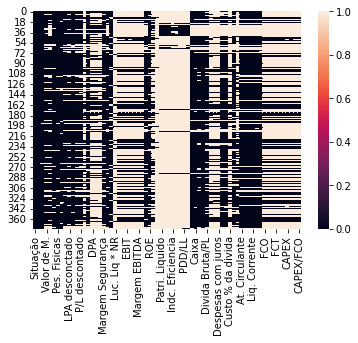

In [ ]:
sns.heatmap(dataset.isnull());
#A parte clara mostra os valores nulos 
#Para ter valores não nulos o grafíco deve ser de uma cor.

In [ ]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

#Quantidade de Registros nulos 

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA desconctado         60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

In [ ]:
dataset.isnull().mean()

Situação               0.000000
Empresa                0.000000
Segmento               0.007958
Valor de M.            0.153846
EV                     0.244032
Majoritar.             0.042440
Pes. Fisicas           0.050398
Categoria              0.076923
LPA                    0.108753
LPA desconctado        0.159151
VPA                    0.100796
P/L                    0.161804
P/L descontado         0.175066
EV/EBITDA              0.649867
P/VPA                  0.169761
DPA                    0.625995
Dividend Yield         0.625995
Payout                 0.681698
Margem Segurança       0.148541
Rec. Liquida           0.135279
Luc. Liquido           0.137931
Luc. Liq * NR          0.864721
Resultado Bruto        0.636605
Margem Bruta           0.636605
EBIT                   0.631300
D&A                    0.633952
EBITDA                 0.631300
Margem EBITDA          0.633952
Res. Financeiro        0.633952
Margem Liquida         0.156499
ROE                    0.129973
ROA     

In [ ]:
#Temos que fazer um tratamento dos dados faltantes
#vamos paagar os valores com mais de 200 valores faltantes.
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
                      'Majoritar.'],
             axis = 1, inplace = True)

In [ ]:
dataset.shape

(377, 32)

In [ ]:
pd.set_option('max_rows', 10)
dataset

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,24.71,24.71,0.38,-0.53,9895.0,555.0,0.0648,20.66,2012.0,3501.000,2721.0,1567.00,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,3.39,22.00,2143.0,703.0,34.6900,37.00,1812.0,537.000,2997.0,2459.00,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,2.42,-63.00,30.0,13.0,38.1500,25.00,48.0,8.000,0.0,-8.00,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,21.69,21.69,3.61,46.00,31.0,17.0,56.0000,22.00,78.0,35.000,3.0,-31.00,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,0.32,116.00,10.0,45.0,157.4500,6.00,721.0,580.000,140.0,-440.75,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,NaN,dividendos,0.21,0.21,1.69,15.64,15.64,1.94,26.00,8447.0,NaN,6.1800,24.00,2130.0,627.000,205.0,-421.00,0.09,10.00,47.0,2.63,4275.0,3598.0,756.0,1.19,0.21,677.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,176.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261.0,109.0,9.3600,11.00,1060.0,331.000,810.0,478.00,0.74,42.00,9.0,2.13,936.0,492.0,512.0,1.90,1.04,444.0
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.0,alerta,-0.52,-0.52,11.61,-7.35,-7.35,0.33,-271.00,777.0,21.0,2.2100,5.00,452.0,135.000,0.0,-135.00,NaN,NaN,NaN,1.18,179.0,59.0,46.0,3.03,0.78,120.0
375,ruim,zain participações s.a opzi,outros,NaN,NaN,2.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.0,NaN,NaN,4.0,2.000,NaN,-2.00,NaN,NaN,NaN,NaN,4.0,1.0,1.0,4.00,1.00,3.0


In [ ]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

#Quantidade de Registros nulos

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [ ]:
#VOU PREENCHER OS DADOS FALTANTES QUE SÃO POUCO PELA MÉDIA 

dataset.fillna(dataset.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()
#Ainda temos valores nulos , os dois dados são valores categoricos 

Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

In [ ]:
#vamos apagar os valores nulos

dataset.dropna(inplace= True )
dataset.shape

(347, 32)

In [ ]:
#Saber a porcentagem de dados que foram apagados na base de dados.
20 / 347 * 100

5.763688760806916

In [ ]:
pd.set_option('max_rows', 10)

VISUALIZAÇÃO E EXPLORAÇÃO DOS DADOS 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

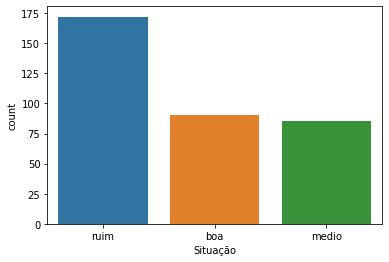

In [ ]:
sns.countplot(x = dataset['Situação']);

A grande maioria da base de dados são de empresas ruim par ainvestimento a longo prazo 

In [ ]:
np.unique(dataset['Situação'], return_counts= True)

(array(['boa', 'medio', 'ruim'], dtype=object), array([ 90,  85, 172]))

Temos a contagem detalhada
  - Ela esta desbalanceada, porque temos dados mais ruim do que boa e classe média.

In [ ]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

Obseravamos que na base de dados tem erros ortográficos.

In [ ]:
#vamos cirar um a função para corrgir os erros ortograficos

def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento

In [ ]:
#teste da função 
corrige_segmento('tansporte aereo')

'transporte aereo'

In [ ]:
#Usando a função para corrigir todos os erroe encontrado na base 

dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [ ]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

In [ ]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2]))

Temos um espaço em branco ao lado de crescimento, isso pode ser considerado como registro

In [ ]:
#Correção crescimento com espaço para sem espaço 

def corrige_categoria(texto):
  categoria = ''
  if texto == 'crescimento ':
    categoria = 'crescimento'
  else:
    categoria = texto
  
  return categoria

In [ ]:
#aplicação na base de dados

dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)

In [ ]:
#vamos analisar a correção 
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2]))

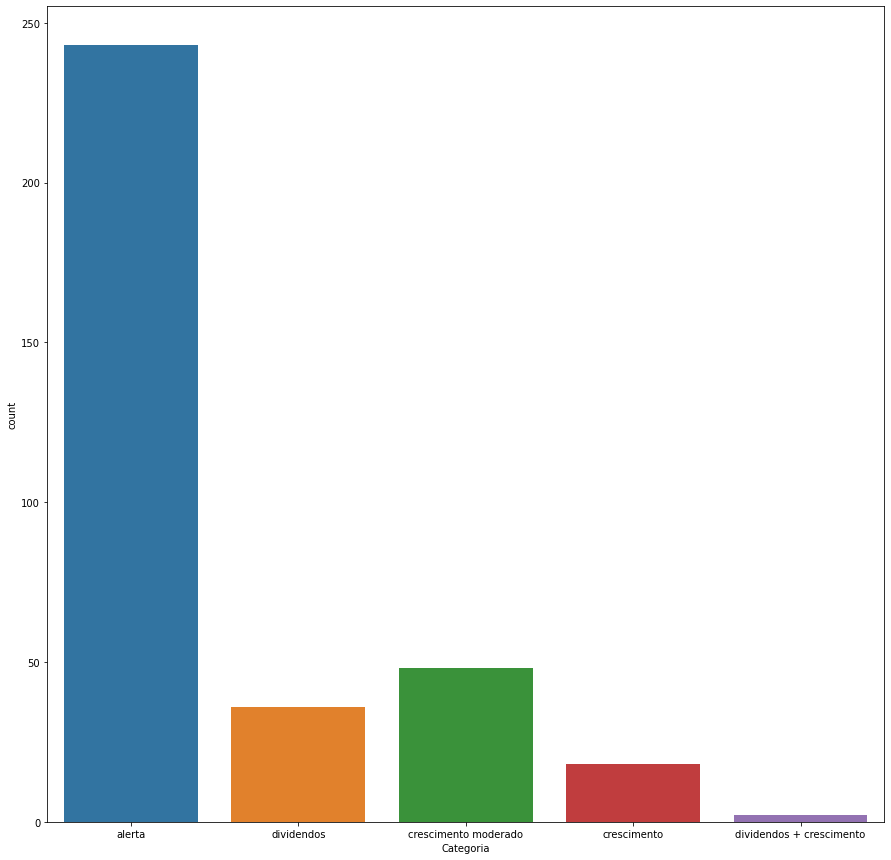

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = dataset['Categoria']);

ESTATISTICA

In [ ]:
dataset.describe()

,Valor de M.,EV,Pes. Fisicas,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
count,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,8.803913e+09,1.045164e+10,2.226064e+04,-7.862101,-9.044851,38.573753,11.139852,12.873580,1.532269,-8.271226e+03,5010.663063,275.393208,13.146021,17.779244,3921.542122,1064.497195,3370.063249,2197.970227,1.763929,29.440006,38.957579,60.010565,3419.550616,2637.292240,1337.298603,2.068703,1.029286,772.802867
std,2.715437e+10,3.435244e+10,1.309892e+05,65.493749,64.456790,842.780784,85.152313,81.671064,2.677774,7.839801e+04,17236.906237,1428.320653,701.080695,23.231773,18025.987138,3568.988904,14968.294847,11614.244102,4.358198,145.468109,23.070951,412.828926,9719.816539,6880.722470,4362.187061,2.903694,2.563236,4676.082846
min,6.750600e+04,-2.623695e+07,1.000000e+00,-806.670000,-806.660000,-3804.860000,-866.700000,-312.210000,-15.600000,-1.079664e+06,1.000000,-2494.000000,-8001.210000,0.000000,-4512.000000,-0.125000,0.000000,-8882.000000,0.000000,-1920.000000,0.000000,1.010000,0.000000,1.000000,0.000000,0.000000,0.000000,-34042.000000
25%,1.651804e+08,3.716960e+08,5.805000e+02,-2.030000,-5.680000,2.695000,-0.615000,-0.555000,0.475000,-8.590000e+02,326.500000,-7.000000,-1.175000,8.000000,168.500000,47.000000,133.500000,28.500000,0.505000,21.500000,22.000000,1.950000,232.000000,203.500000,40.500000,0.970000,0.170000,-1.500000
50%,1.362357e+09,3.583574e+09,1.773000e+03,0.130000,0.086000,9.470000,8.830000,9.580000,1.130000,-8.100000e+01,1462.000000,30.000000,6.180000,14.000000,1046.000000,323.000000,977.000000,458.000000,1.110000,31.000000,38.872065,3.030000,1307.000000,1022.000000,455.000000,1.660000,0.600000,243.000000
75%,8.596999e+09,1.021776e+10,6.354500e+03,1.185000,1.060000,22.565000,14.765000,14.840000,1.700000,-1.555000e+00,4752.448221,307.596923,12.658474,18.404238,3401.500000,1006.666295,3203.312693,2080.015076,1.720811,52.500000,51.500000,43.680000,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481
max,2.866893e+11,4.998736e+11,1.803724e+06,200.660000,160.780000,14896.470000,861.240000,952.660000,24.760000,1.344470e+05,270810.000000,17415.000000,8402.000000,285.430000,288806.000000,59223.000000,258468.000000,199245.000000,68.000000,1197.000000,100.000000,6723.190000,145907.000000,81167.000000,71664.000000,30.750000,30.500000,64740.000000


In [ ]:
#Empreesa com saldo negativo para invetimento    ====== RISCO
dataset[dataset['LPA'] == -806.670000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,-0.39,-0.39,0.02,-2999.0,65.0,3.0,2.35,2.0,236.0,34.0,50.0,15.0,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


In [ ]:
#Ruim para investimento a longo prazo , mas esta com valo alto 
dataset[dataset['LPA'] == 200.660000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
254,ruim,minasmaquinas s.a mmaq,material de transporte,8.596999e+09,1.021776e+10,1055.0,alerta,200.66,-8.723009,1605.35,10.669968,12.338617,1.677604,-7975.95134,236.0,9.0,4.26,14.0,69.0,13.0,19.0,5.0,0.31,18.0,100.0,1.49,130.0,51.0,47.0,2.55,0.92,79.0


In [ ]:
dataset[dataset['LPA desconctado'] == 160.780000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
194,ruim,hercules s.a fabrica de talheres heta,utensilios domesticos,2121596.0,307121596.0,592.0,alerta,160.78,160.78,-656.86,0.02,0.02,1.677604,44463.0,4.0,2.0,1633.0,18.404238,-334.0,1006.666295,135.0,135.0,1.720811,-360.0,25.0,62.646871,1.0,8.0,0.0,0.13,0.0,-7.0


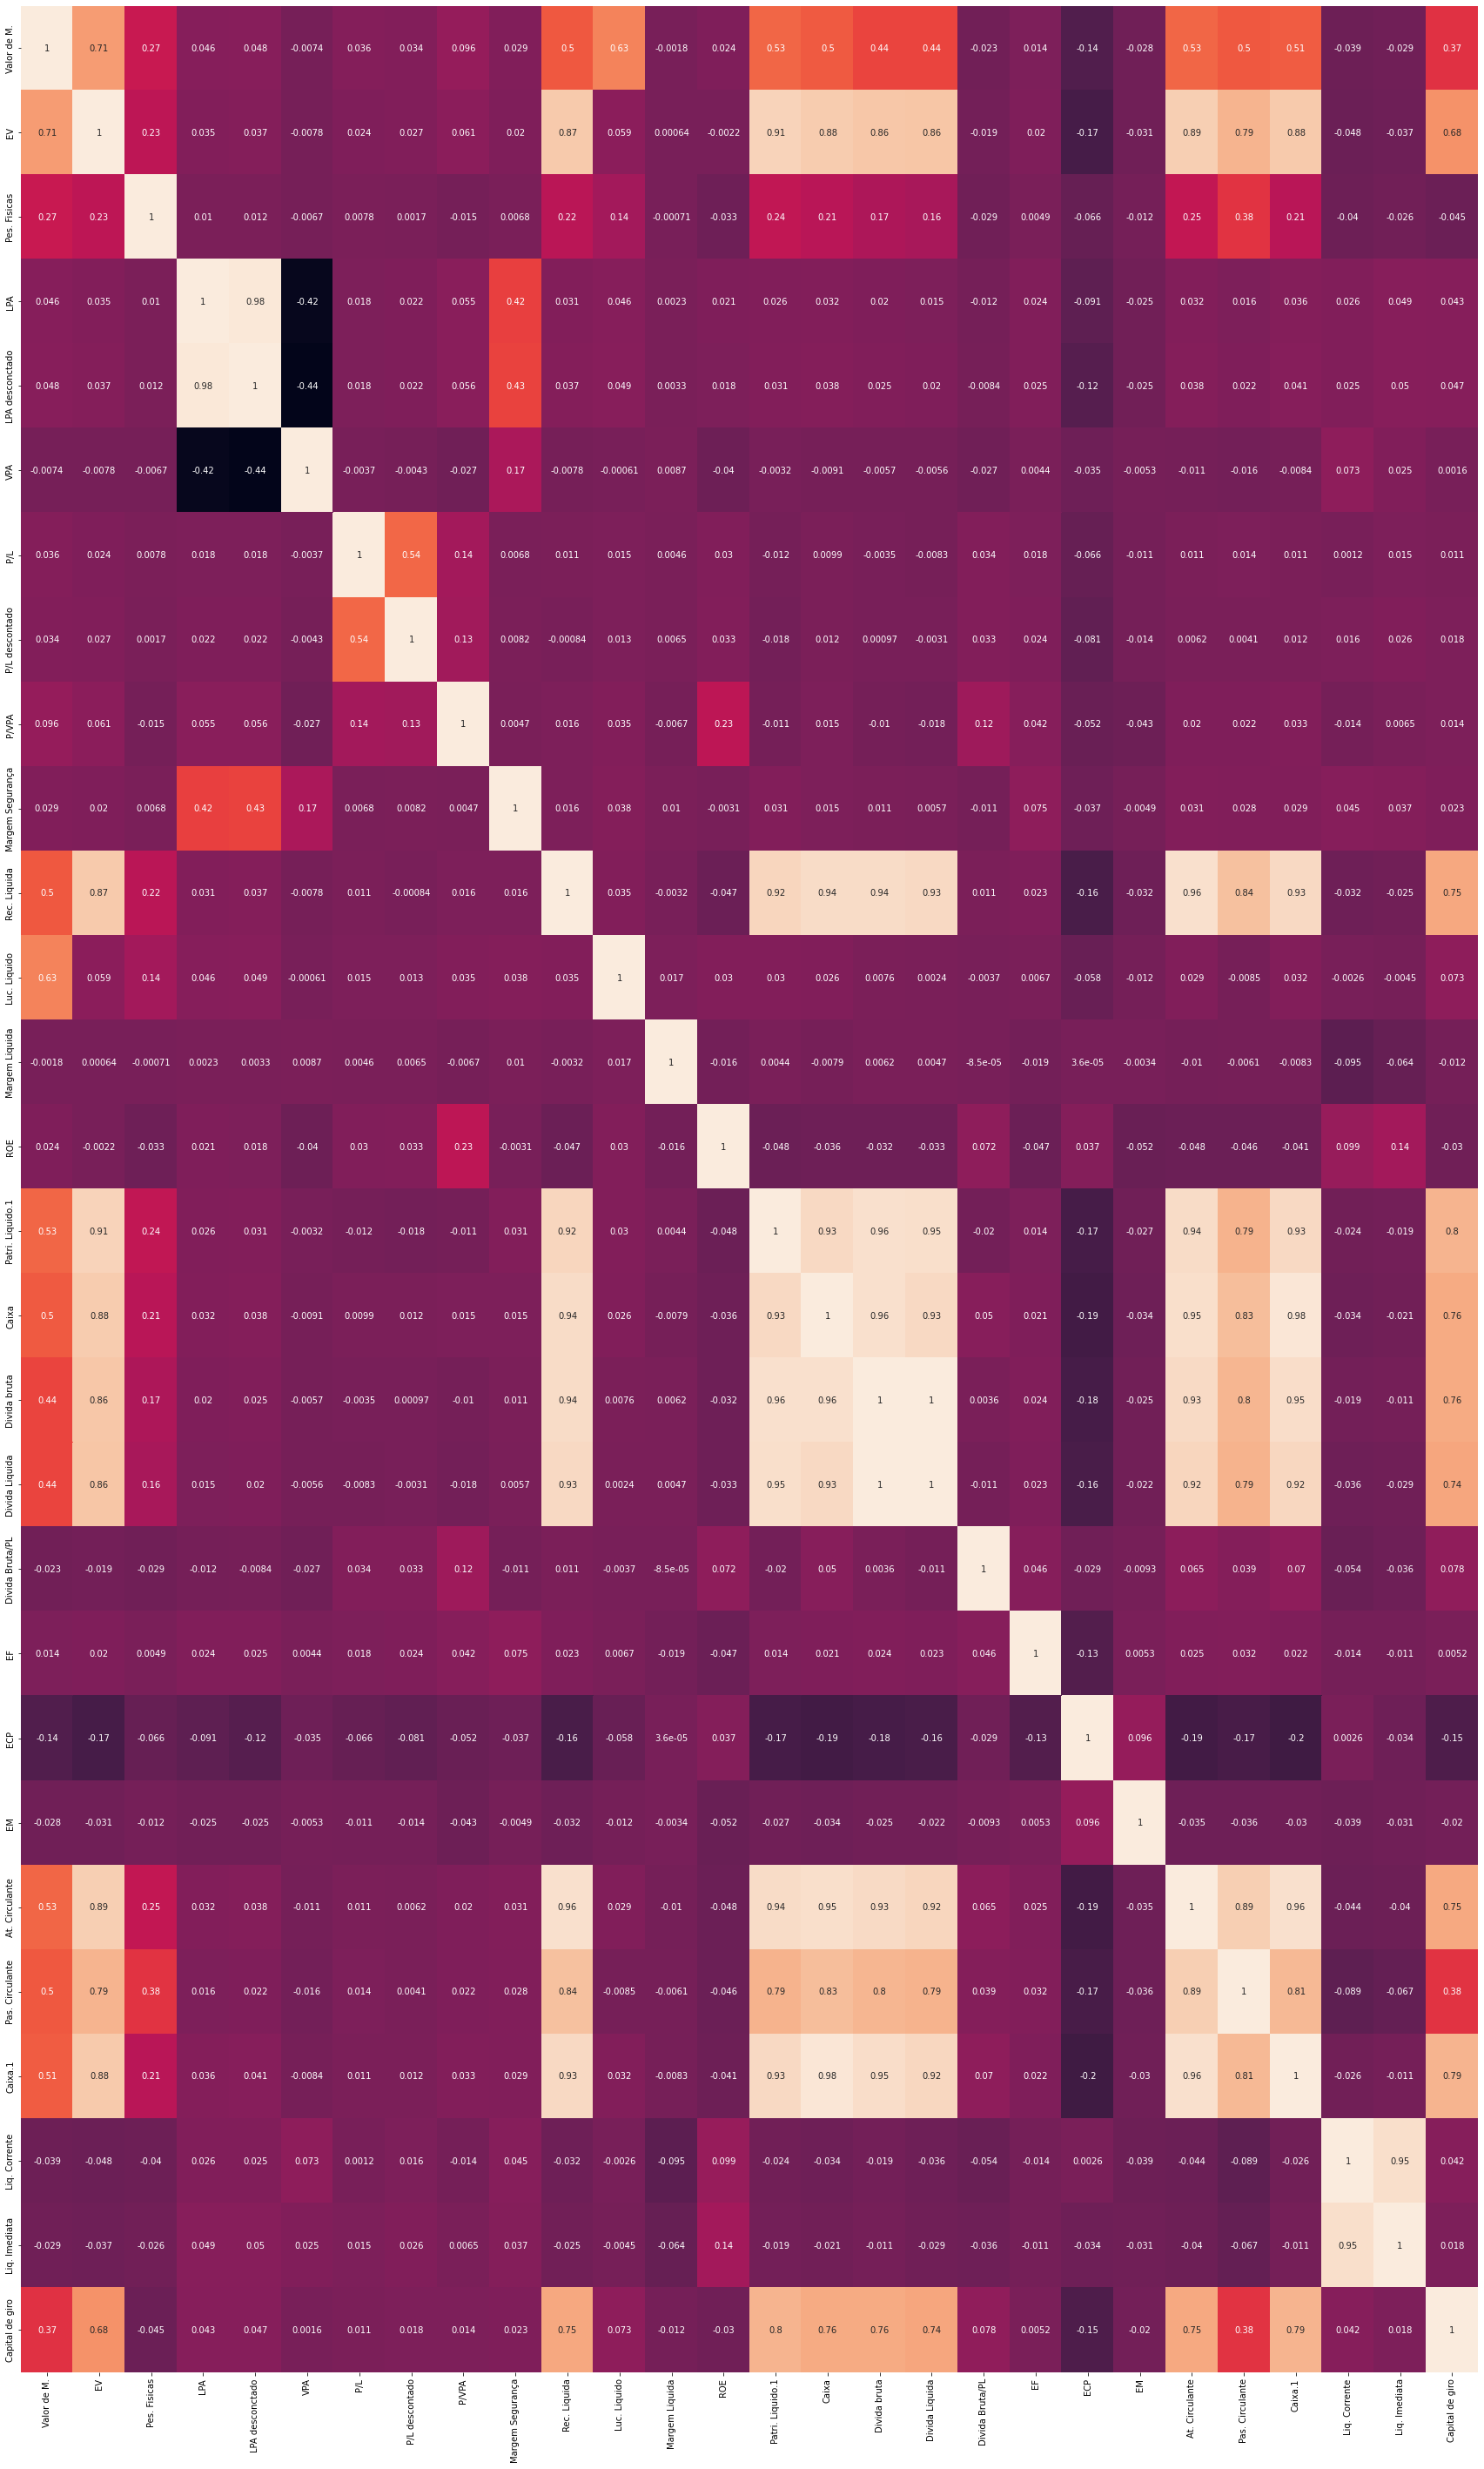

In [ ]:
#Matriz de correlaçãopara ver os dados similares
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot= True, cbar=False);

In [ ]:
#Apagar colunas que não serão usadas 

dataset.drop(['Rec. Liquida', 'Caixa'], axis=1, inplace= True)

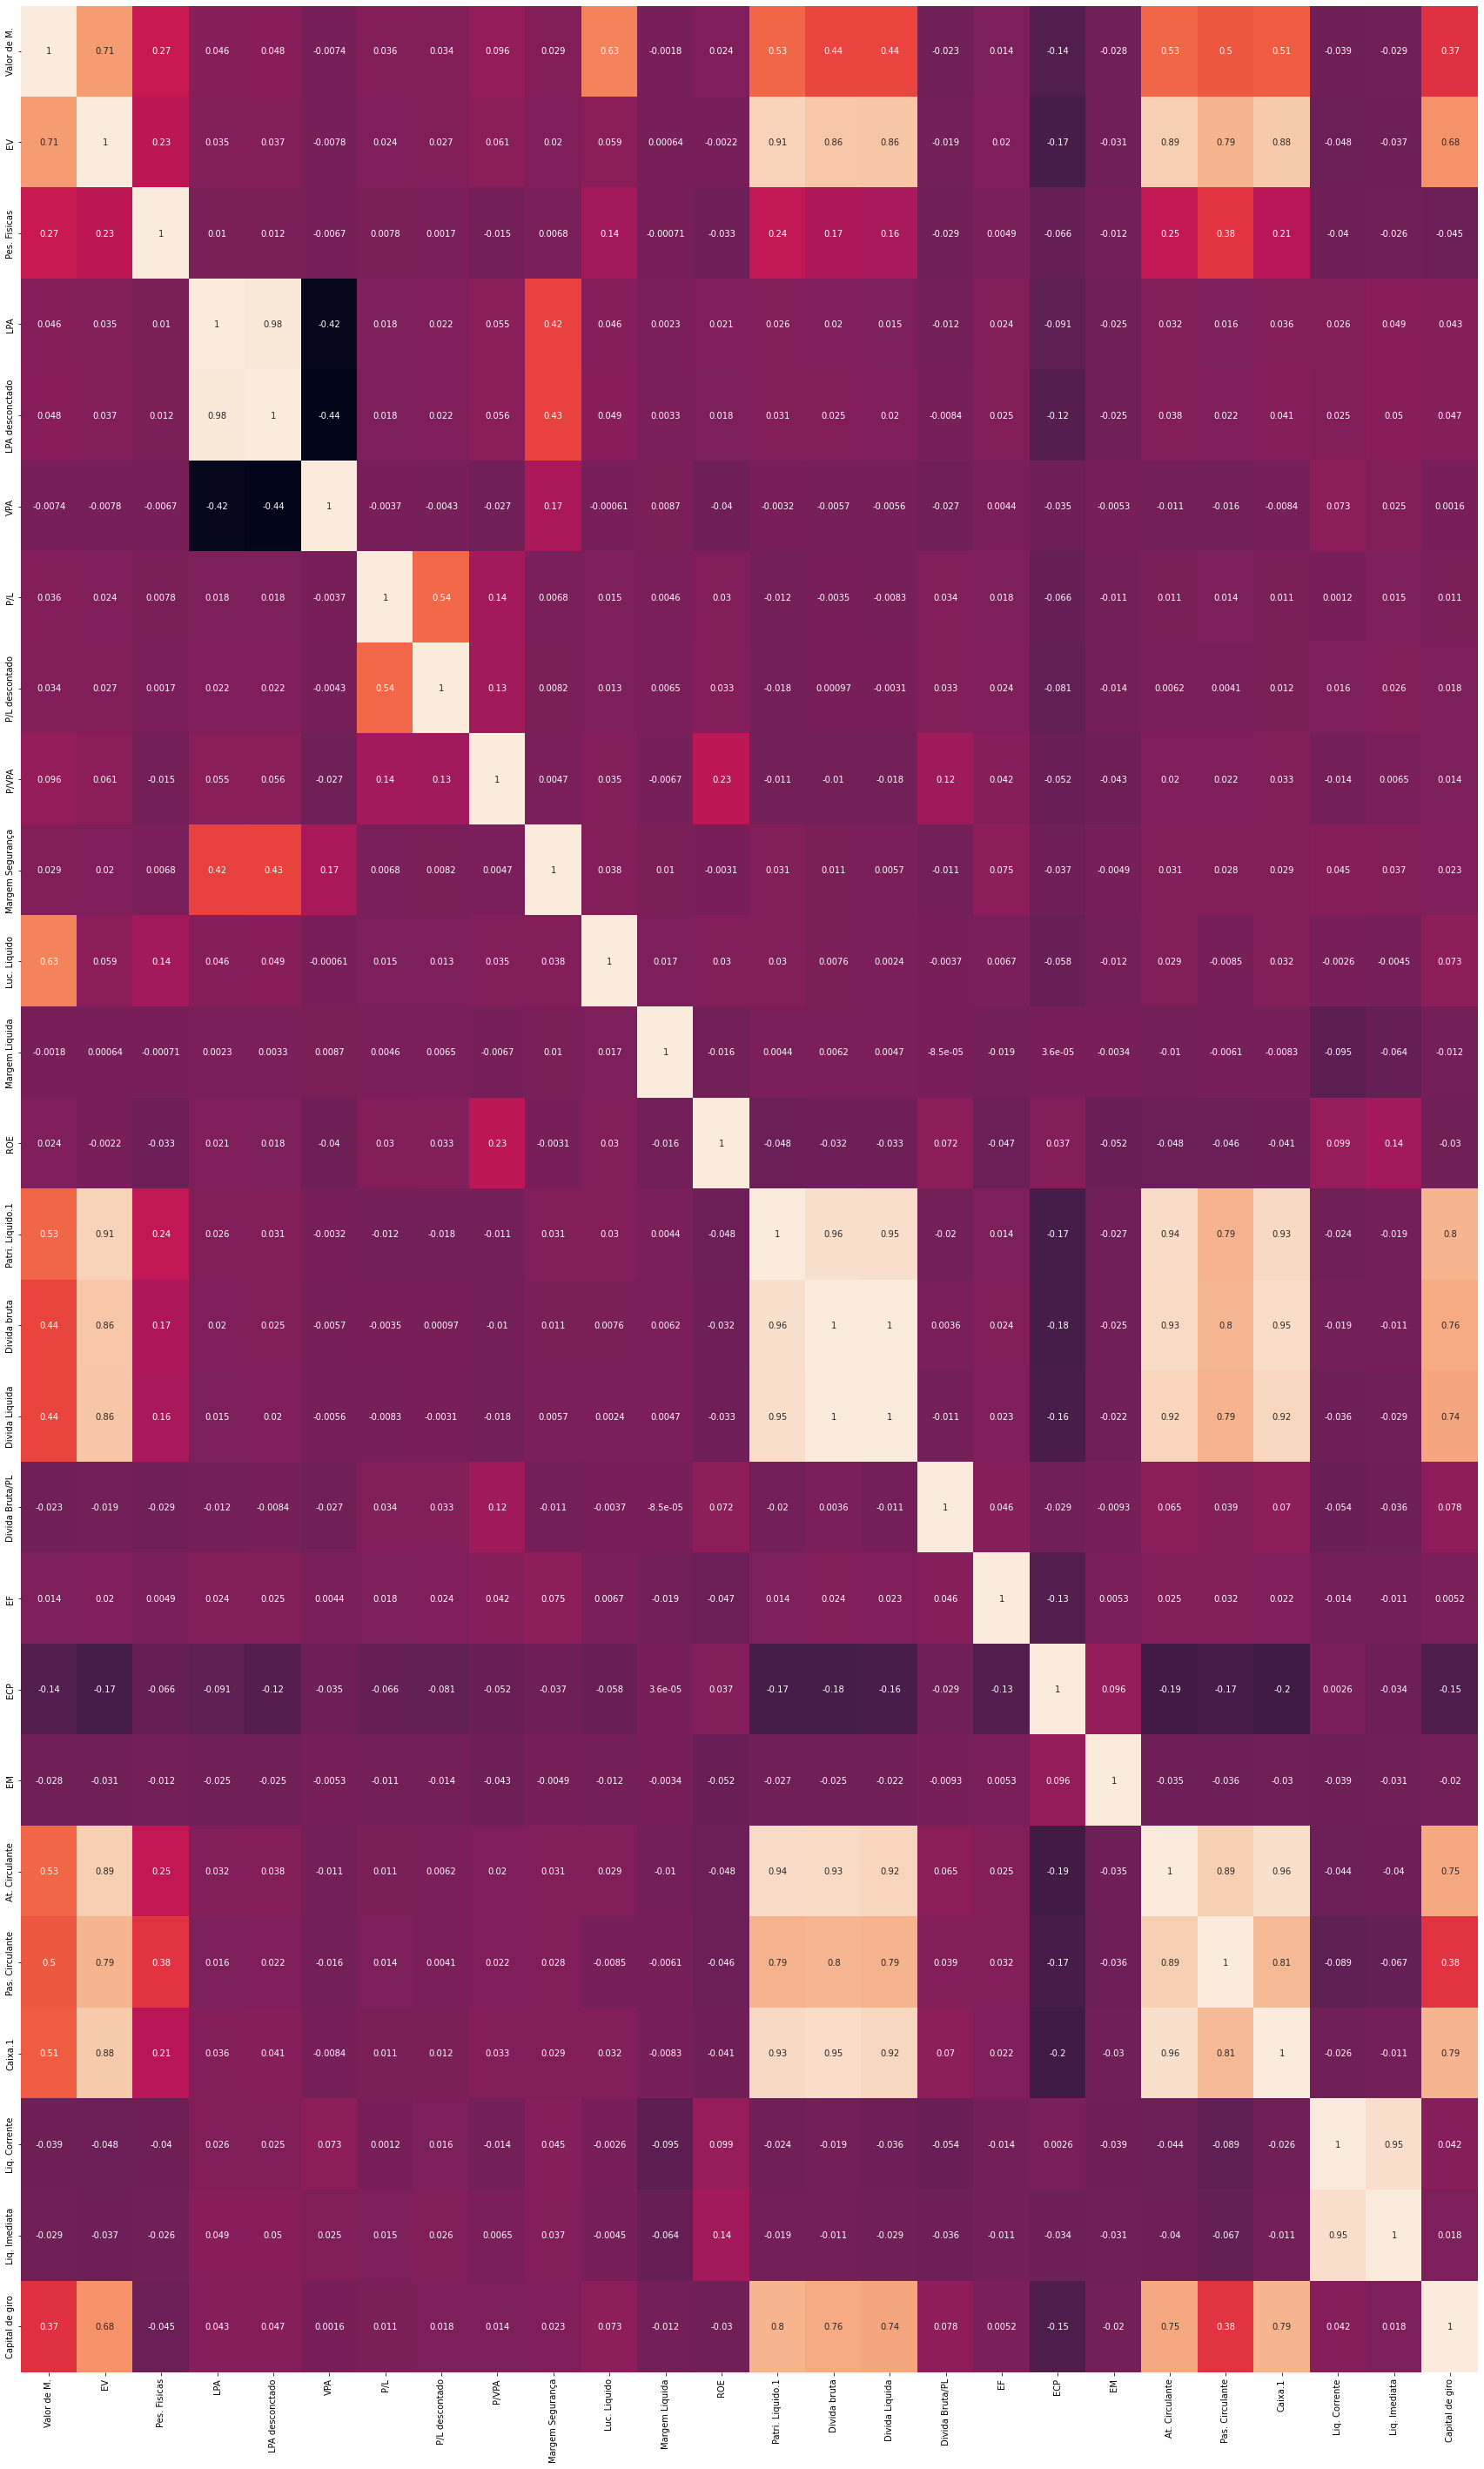

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot= True, cbar=False);

In [ ]:
dataset.drop(['Divida bruta', 'LPA', 'Caixa.1'], axis= 1, inplace = True )

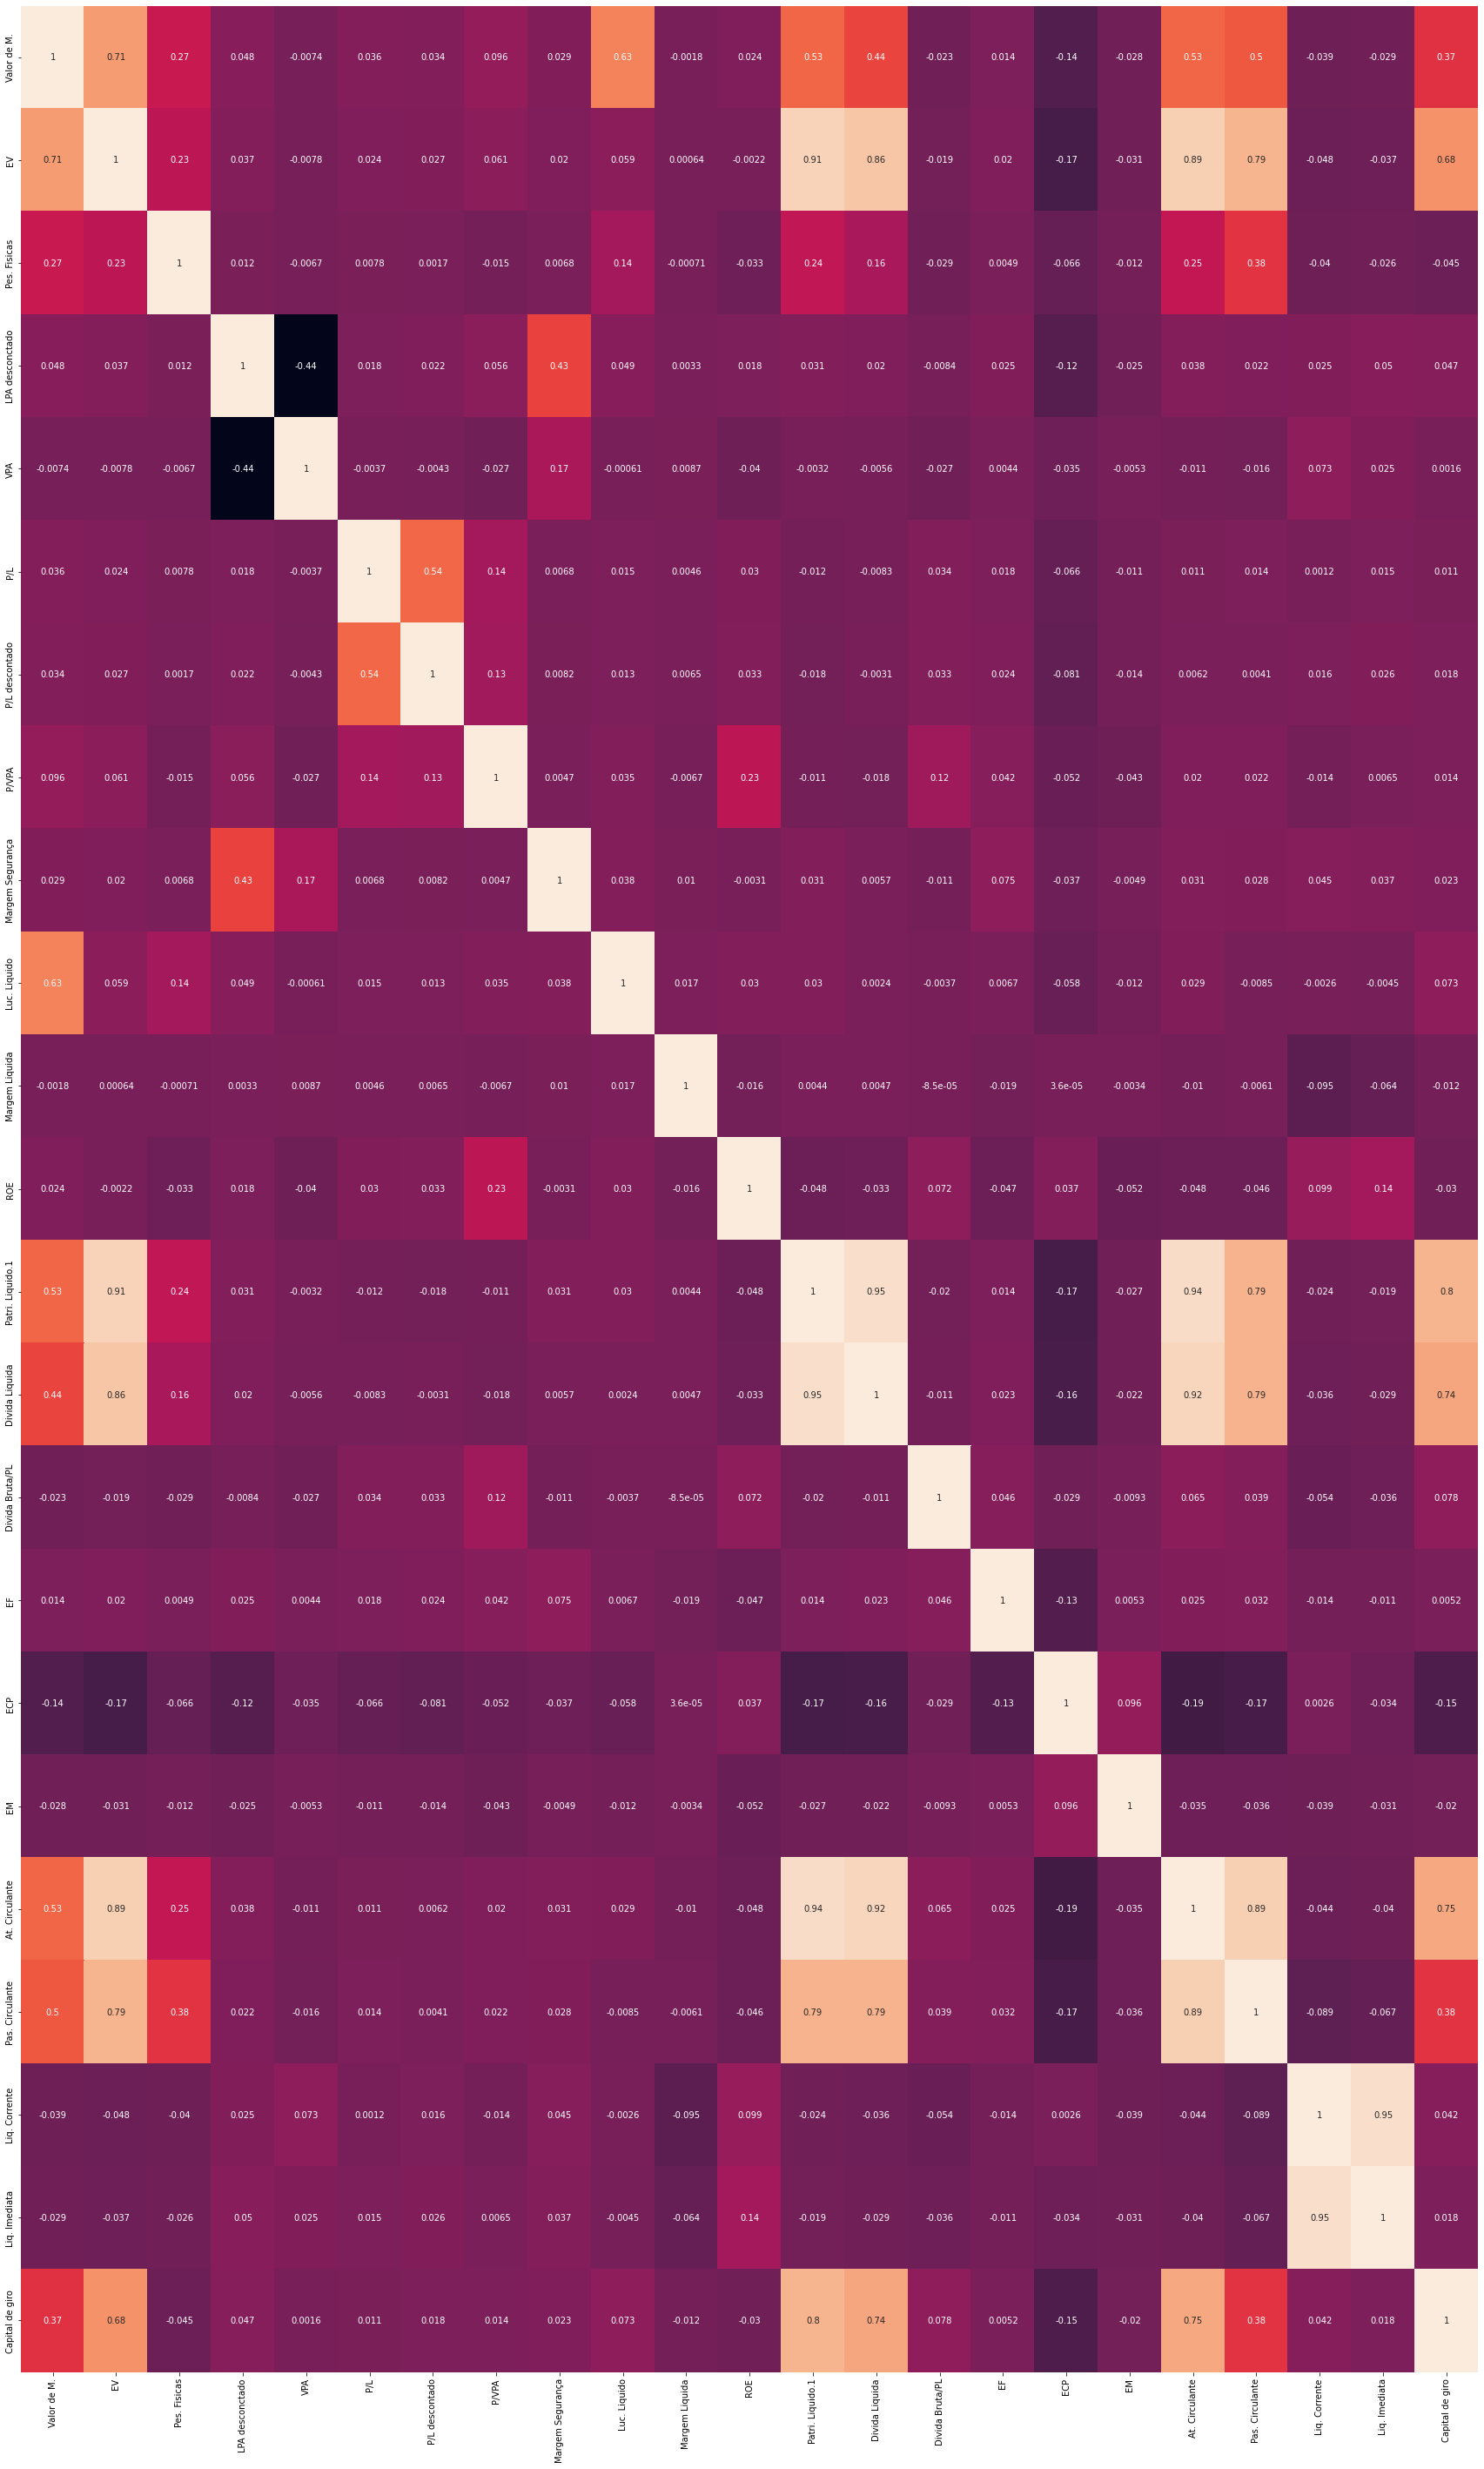

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot= True, cbar=False);

In [ ]:
dataset.drop(['At. Circulante', 'Liq. Corrente'], axis = 1, inplace = True)

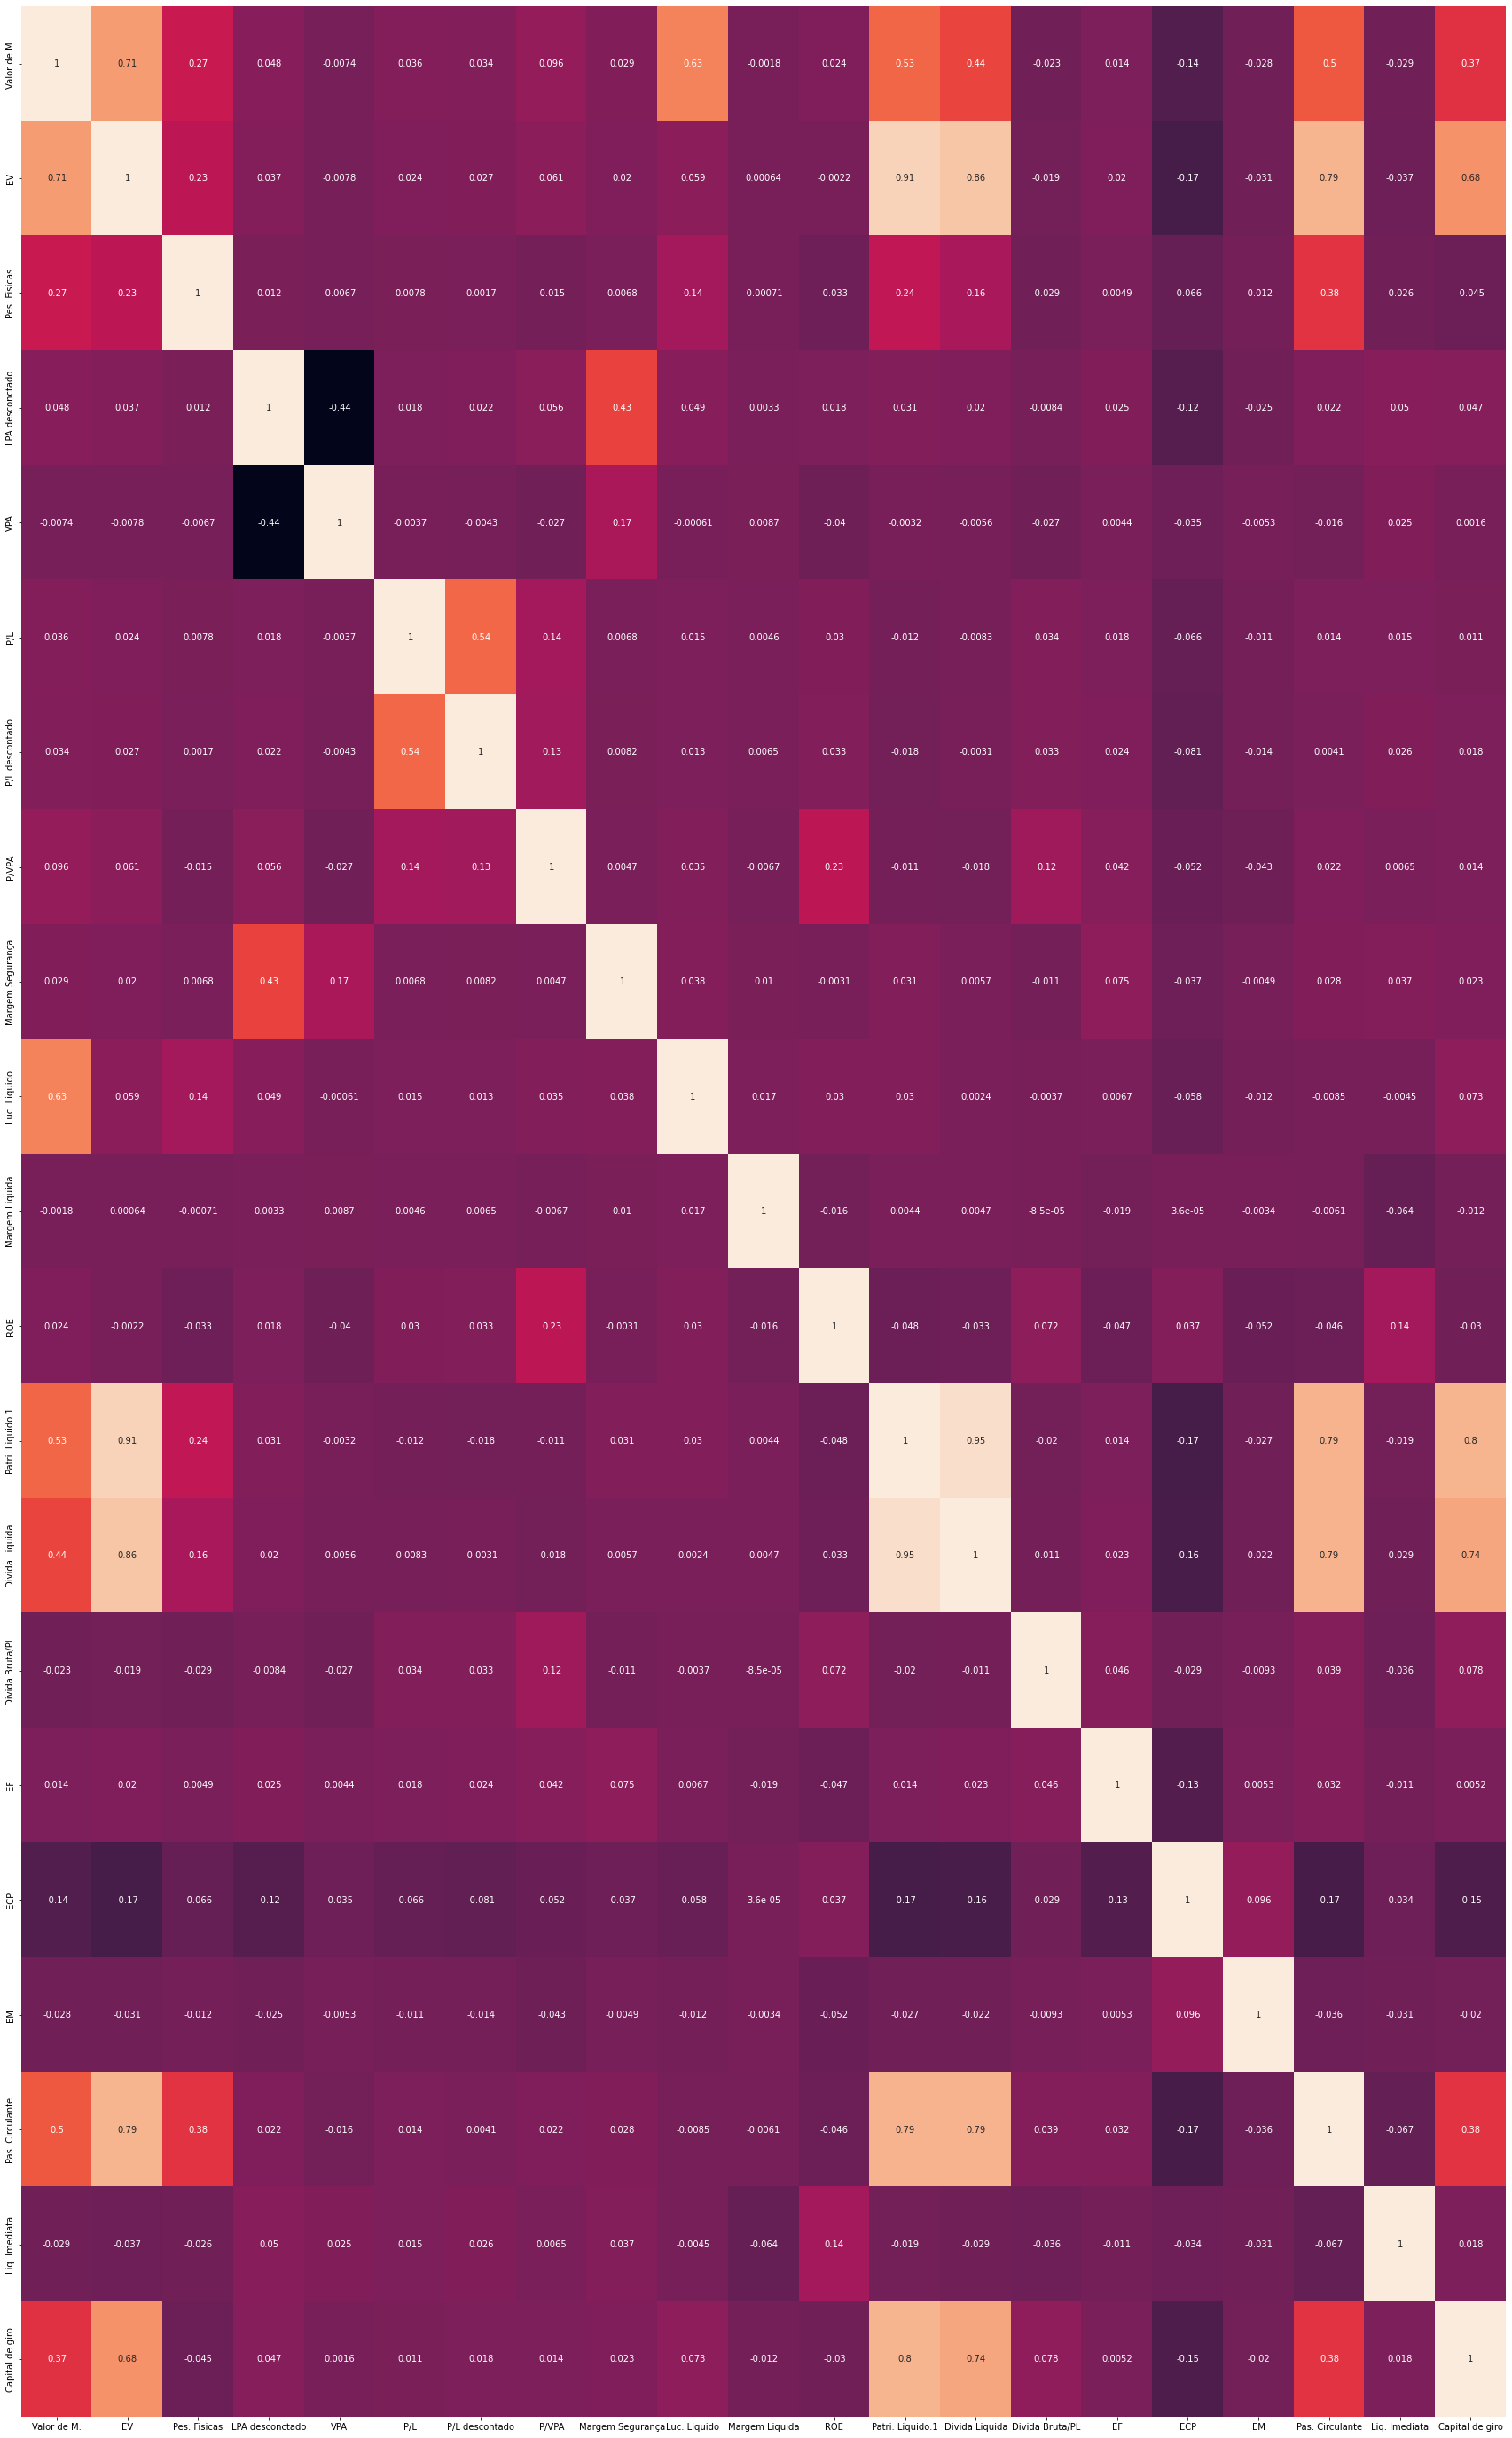

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot= True, cbar=False);

Chegamos a conclusão que os atributos são correlacionados 

VARIÁVEIS DUMMY

In [ ]:
dataset.head(1)

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,0.0648,20.66,2012.0,1567.0,0.86,49.0,11.0,3.94,4508.0,0.12,102.0


In [ ]:
#Dammy == segmentos, transformar dados caracter em valores númericos

y = dataset['Situação'].values
y



array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [ ]:
empresa = dataset['Empresa']
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [ ]:
#X_cat é igual a X_categorico

#Foi criado um novo dataset 
X_cat = dataset[['Segmento','Categoria']]
X_cat

,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado
...,...,...
372,eletrodomesticos,dividendos
373,serviços de apoio e armazenagem,alerta
374,material de transporte,alerta
375,outros,alerta


In [ ]:
#Formato Dumpy

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Foi feito a conversão para o dumpy

In [ ]:
X_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [ ]:
X_cat.shape

(347, 90)

In [ ]:
#tipo de dados 
type(X_cat)

numpy.ndarray

In [ ]:
#Vamos passar para um DataFrme

X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
#Outra variavel 

dataset_original = dataset.copy()

In [ ]:
#apagar os dados categoricos
dataset.drop(['Segmento', 'Categoria', 'Situação', 'Empresa'], axis=1, inplace=True)

In [ ]:
dataset

#Observamos que temos apenas os dados categoricos 

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [ ]:
#Criar uma nova coluna e adicionar os registros

dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            366, 367, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=347)

In [ ]:
#Saber a quantidade de index

X_cat.index

RangeIndex(start=0, stop=347, step=1)

Observando o index temos uma diferença , um mostra 376 registros e o outro mostra 347


In [ ]:
#Dessa forma igualamos os index 
dataset.index = X_cat.index

In [ ]:
#Vamos concatenar o X_cat 

dataset = pd.concat([dataset, X_cat], axis=1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.3500

NORMALIZAÇÃO 

In [ ]:
#A normalização é pada deixar os dados na mesma escalas.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_normalizado = scaler.fit_transform(dataset)


#Dados Normalizados 

In [ ]:
dataset_normalizado

#Lembrando, não usa head para ver os dados , porque estamos utilizando uma Array

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
dataset_normalizado[0]

array([4.65507421e-03, 8.83755803e-03, 8.85280057e-03, 8.34387662e-01,
       2.05380580e-01, 5.15880181e-01, 2.66367295e-01, 3.95936571e-01,
       8.89262572e-01, 1.53146818e-01, 4.87787134e-01, 7.23820201e-02,
       2.22420717e-02, 5.02049230e-02, 1.26470588e-02, 6.31697145e-01,
       1.10000000e-01, 4.35870506e-04, 5.55281768e-02, 3.93442623e-03,
       3.45650017e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
#Criar a variavel que vai amarmazer os dados previsores 

#Fazer uma copia do dataset
X = dataset_normalizado.copy()
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X.shape

(347, 111)

In [ ]:
y
#classe

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

AVALIAÇÃO DOS ALGORITMOS 1

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
resultados_forest = []
resultados_neural = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest.append(scores.mean())

  network = MLPClassifier(hidden_layer_sizes=(175, 175))
  scores = cross_val_score(network, X, y, cv = kfold)
  resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

In [ ]:
resultados_forest

array([0.64815126, 0.63739496, 0.64521008, 0.63722689, 0.65084034,
       0.63420168, 0.6505042 , 0.64319328, 0.65411765, 0.65142857,
       0.63394958, 0.62546218, 0.63428571, 0.64512605, 0.64831933,
       0.63672269, 0.62815126, 0.63722689, 0.64848739, 0.63983193,
       0.65403361, 0.63403361, 0.61142857, 0.6310084 , 0.64327731,
       0.64563025, 0.65689076, 0.64537815, 0.64277311, 0.63991597])

Vetor de 30 posições o valor de 0.63 é a media de 10 testes, pelo fato de colocar 10 no split

In [ ]:
resultados_neural

array([0.52697479, 0.54176471, 0.56773109, 0.53285714, 0.52697479,
       0.55302521, 0.55378151, 0.53033613, 0.54428571, 0.53319328,
       0.5387395 , 0.54478992, 0.53571429, 0.53008403, 0.54756303,
       0.55386555, 0.57067227, 0.55957983, 0.51554622, 0.54722689,
       0.55336134, 0.5502521 , 0.54243697, 0.52731092, 0.55403361,
       0.53302521, 0.53613445, 0.55008403, 0.56512605, 0.53058824])

In [ ]:
resultados_forest.mean(), resultados_neural.mean()

(0.6411400560224091, 0.543235294117647)

AVALIAÇÃO COM BASE DE TREINO E TESTE

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamneto, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)#205 da base para teste e 80 para treinamento 



In [ ]:
X_treinamneto.shape, y_treinamento.shape

((277, 111), (277,))

Vamos usar 277 registros para treinar

In [ ]:
X_teste.shape, y_teste.shape

((70, 111), (70,))

Temos o total de 70 registros para usar para avaliar o algoritmo

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamneto, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Gerar as previsões

previsoes = random_forest.predict(X_teste)

In [ ]:
previsoes

array(['boa', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim',
       'medio', 'ruim', 'ruim', 'boa', 'medio', 'ruim', 'boa', 'ruim',
       'medio', 'boa', 'boa', 'boa', 'ruim', 'medio', 'boa', 'boa',
       'ruim', 'ruim', 'boa', 'medio', 'ruim', 'ruim', 'medio', 'boa',
       'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'ruim',
       'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'medio', 'ruim', 'ruim', 'ruim', 'ruim'], dtype=object)

In [ ]:
#vamos fazer um comparativo

y_teste

array(['ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'medio',
       'boa', 'medio', 'boa', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'medio', 'medio', 'medio', 'medio', 'medio', 'medio',
       'ruim', 'ruim', 'ruim', 'boa', 'boa', 'boa', 'ruim', 'medio',
       'boa', 'medio', 'ruim', 'ruim', 'boa', 'medio', 'ruim', 'ruim',
       'medio', 'boa', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'boa', 'boa', 'ruim', 'medio', 'boa', 'ruim', 'ruim', 'ruim',
       'medio', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'boa',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'ruim'],
      dtype=object)

O comparativo mostra que a primeira empresa é boa e o no segundo registro mostrou que é ruim. 

Temos que fazer o comparrativo empresa por empresa.

In [ ]:
#VAMOS CALCULAR O PERCENTUAL DE ACERTOS

accuracy_score(y_teste, previsoes)

0.7142857142857143

chegamos ao percentual de 74% é um resultado interessante para a base de dados.

In [ ]:
#MAMTRIZ DE CONFUSÃO 

cm = confusion_matrix(y_teste, previsoes)
cm

#Os acertos estão na diagonal principal , o meu comepçou pelo numero 12

array([[12,  2,  3],
       [ 4,  6,  6],
       [ 4,  1, 32]])

In [ ]:
(12 + 6 + 32) / 70

0.7142857142857143

Temos o mesmo valor da accuracy

In [ ]:
random_forest.classes_

array(['boa', 'medio', 'ruim'], dtype=object)

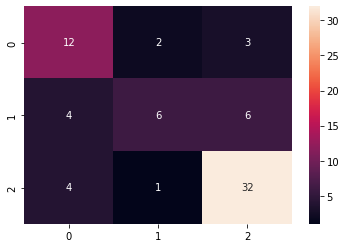

In [ ]:
#Mapa de calor

sns.heatmap(cm, annot=True );




BOA
- Temos 12 empresas BOAS consideradas como BOAS.
- Temos 2 empresas  BOAS  consideradas como MEDIA.
- Temos 3 empresas  BOAS consideradas como RUIM.

MÉDIA

- Temos 4 empresas MÉDIA consideradas como BOAS.
- Temos 6 empresas MÉDIA consideradas como MEDIA.
- Temos 6 empresas MÉDIA consideradas como RUIM.

RUIM

- Temos 4 empresas RUIM consideradas como BOAS.
- Temos 1 empresas RUIM consideradas como MEDIA.
- Temos 32 empresas RUIM  consideradas como RUIM.

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         boa       0.60      0.71      0.65        17
       medio       0.67      0.38      0.48        16
        ruim       0.78      0.86      0.82        37

    accuracy                           0.71        70
   macro avg       0.68      0.65      0.65        70
weighted avg       0.71      0.71      0.70        70



- O algoritmo consegue identificar 71% das empresas boas 
- O algoritmo consegue identificar 86% das empresas ruins
- O algoritmo consegue identificar 38% das empresas médias 

In [ ]:
X_teste[0].shape

(111,)

In [ ]:
#fazer o Teste com um Determinado Registro 

#Transformar em uma matriz 

X_teste[0].reshape(1, -1)

array([[1.15144610e-01, 9.18764485e-02, 1.14163871e-02, 8.33343670e-01,
        2.04257665e-01, 4.49529498e-01, 1.75725569e-01, 4.53419227e-01,
        8.89170760e-01, 1.40720123e-01, 4.88029477e-01, 3.15313737e-02,
        6.30101119e-02, 7.52617392e-02, 1.19117647e-02, 6.29772217e-01,
        2.60000000e-01, 3.27274783e-04, 1.43409802e-04, 1.57377049e-02,
        4.07928570e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
#Vamos ver a qualificação da empresa
random_forest.predict(X_teste[0].reshape(1, -1))

array(['boa'], dtype=object)

Fez a previsão como uma empresa boa 

In [ ]:
random_forest.predict(X_teste[12].reshape(1, -1))

array(['boa'], dtype=object)

In [ ]:
#Vai indicar a importãncia das caracteristicas, vai indicar uma nota para cada atributo.
# OU seja vai mostrar para nós se a empresa e boa média ou ruim.
random_forest.feature_importances_

array([5.22905633e-02, 4.32625951e-02, 4.68269489e-02, 7.76215059e-02,
       4.23029335e-02, 4.64541128e-02, 3.72547302e-02, 5.28434051e-02,
       4.66577618e-02, 6.70836915e-02, 4.04078833e-02, 3.89188367e-02,
       4.44652102e-02, 3.59339860e-02, 3.20021526e-02, 2.41231162e-02,
       3.04941037e-02, 3.77879016e-02, 2.82151026e-02, 2.93849863e-02,
       3.65014076e-02, 9.63846568e-04, 2.70926996e-03, 8.42490463e-05,
       8.22288922e-04, 1.36379222e-03, 7.66637717e-05, 9.64968854e-04,
       9.70465016e-04, 9.69850249e-05, 1.48275133e-04, 2.60805064e-03,
       7.11176284e-04, 9.70122540e-04, 4.75420192e-06, 7.61815076e-04,
       1.37229095e-03, 3.82020723e-06, 1.62686224e-05, 1.11107198e-03,
       8.38546922e-05, 4.37652715e-04, 9.24078595e-04, 2.11960872e-04,
       2.85799124e-03, 6.29960967e-04, 1.37551417e-03, 6.91870401e-03,
       4.22827430e-07, 7.27713235e-05, 7.76219874e-07, 6.45714433e-05,
       1.31435196e-03, 5.71924019e-04, 2.12562491e-03, 2.48281060e-04,
      

In [ ]:
np.argmax(random_forest.feature_importances_)

3

apareceu como exemplo o numero 3, o valor é 7.76215059e-02 , é o maior valor dentro da base de dados 


In [ ]:
#Criar um for para mostrar todos os valores
# O COMANDO ZIP É UTILIZAQUE QUANDO QUER POERCORRER DUAS VARIAVEIS, AS COLUNAS E AS LINHAS(A IMPORTANCIA DE CADA UMA DELAS)


for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
  print(nome, " = ", importancia)

Valor de M.  =  0.05229056332945533
EV  =  0.04326259507398654
Pes. Fisicas  =  0.046826948857035346
LPA desconctado  =  0.07762150591459127
VPA  =  0.042302933489248185
P/L  =  0.0464541127779112
P/L descontado  =  0.037254730190826334
P/VPA  =  0.0528434050847873
Margem Segurança  =  0.04665776179566472
Luc. Liquido  =  0.06708369146870156
Margem Liquida  =  0.0404078832559929
ROE  =  0.038918836675735625
Patri. Liquido.1  =  0.0444652101726491
Divida Liquida  =  0.03593398604549232
Divida Bruta/PL  =  0.03200215263524108
EF  =  0.024123116152075807
ECP  =  0.03049410369917458
EM  =  0.037787901618245065
Pas. Circulante  =  0.028215102580813667
Liq. Imediata  =  0.029384986301846085
Capital de giro  =  0.036501407631538293
0  =  0.0009638465681964685
1  =  0.002709269959608747
2  =  8.42490463323318e-05
3  =  0.0008222889220978237
4  =  0.001363792222936593
5  =  7.666377174737086e-05
6  =  0.0009649688543087522
7  =  0.0009704650162125658
8  =  9.698502485431989e-05
9  =  0.00014827

Um dos valores mais importante é o  Valor de M(valor de mercado).,  logo em seguida temos os outros da base.

Grafico

In [ ]:
#Criar uma variavel 
caracteristicas = dataset.columns
caracteristicas

Index([     'Valor de M.',               'EV',     'Pes. Fisicas',
        'LPA desconctado',              'VPA',              'P/L',
         'P/L descontado',            'P/VPA', 'Margem Segurança',
           'Luc. Liquido',
       ...
                       80,                 81,                 82,
                       83,                 84,                 85,
                       86,                 87,                 88,
                       89],
      dtype='object', length=111)

In [ ]:
#Criar uma variavel 
importancias = random_forest.feature_importances_
importancias 

array([5.22905633e-02, 4.32625951e-02, 4.68269489e-02, 7.76215059e-02,
       4.23029335e-02, 4.64541128e-02, 3.72547302e-02, 5.28434051e-02,
       4.66577618e-02, 6.70836915e-02, 4.04078833e-02, 3.89188367e-02,
       4.44652102e-02, 3.59339860e-02, 3.20021526e-02, 2.41231162e-02,
       3.04941037e-02, 3.77879016e-02, 2.82151026e-02, 2.93849863e-02,
       3.65014076e-02, 9.63846568e-04, 2.70926996e-03, 8.42490463e-05,
       8.22288922e-04, 1.36379222e-03, 7.66637717e-05, 9.64968854e-04,
       9.70465016e-04, 9.69850249e-05, 1.48275133e-04, 2.60805064e-03,
       7.11176284e-04, 9.70122540e-04, 4.75420192e-06, 7.61815076e-04,
       1.37229095e-03, 3.82020723e-06, 1.62686224e-05, 1.11107198e-03,
       8.38546922e-05, 4.37652715e-04, 9.24078595e-04, 2.11960872e-04,
       2.85799124e-03, 6.29960967e-04, 1.37551417e-03, 6.91870401e-03,
       4.22827430e-07, 7.27713235e-05, 7.76219874e-07, 6.45714433e-05,
       1.31435196e-03, 5.71924019e-04, 2.12562491e-03, 2.48281060e-04,
      

In [ ]:
#OUtra variavel 

indices = np.argsort(importancias)
indices

array([ 62,  67, 104,  64,  76,  74,  87,  70,  81,  48,  50,  95,  37,
        34,  38,  58,  51,  49,  26,  40,  23,  29,  89,  30,  69, 103,
       105,  86, 101,  43,  77,  57,  55,  61,  94,  66,  65,  91,  41,
        88,  79, 102,  82,  75,  85,  53,  68,  60,  45,  32,  84,  35,
        24, 110,  42,  99,  21,  27,  33,  28,  96,  63,  73,  59,  90,
        39,  72,  52,  25,  36,  46,  93,  78, 100,  98,  92,  83,  54,
        97,  56,  80,  31,  22,  44,  71, 107, 109,  47, 108, 106,  15,
        18,  19,  16,  14,  13,  20,   6,  17,  11,  10,   4,   1,  12,
         5,   8,   2,   0,   7,   9,   3])

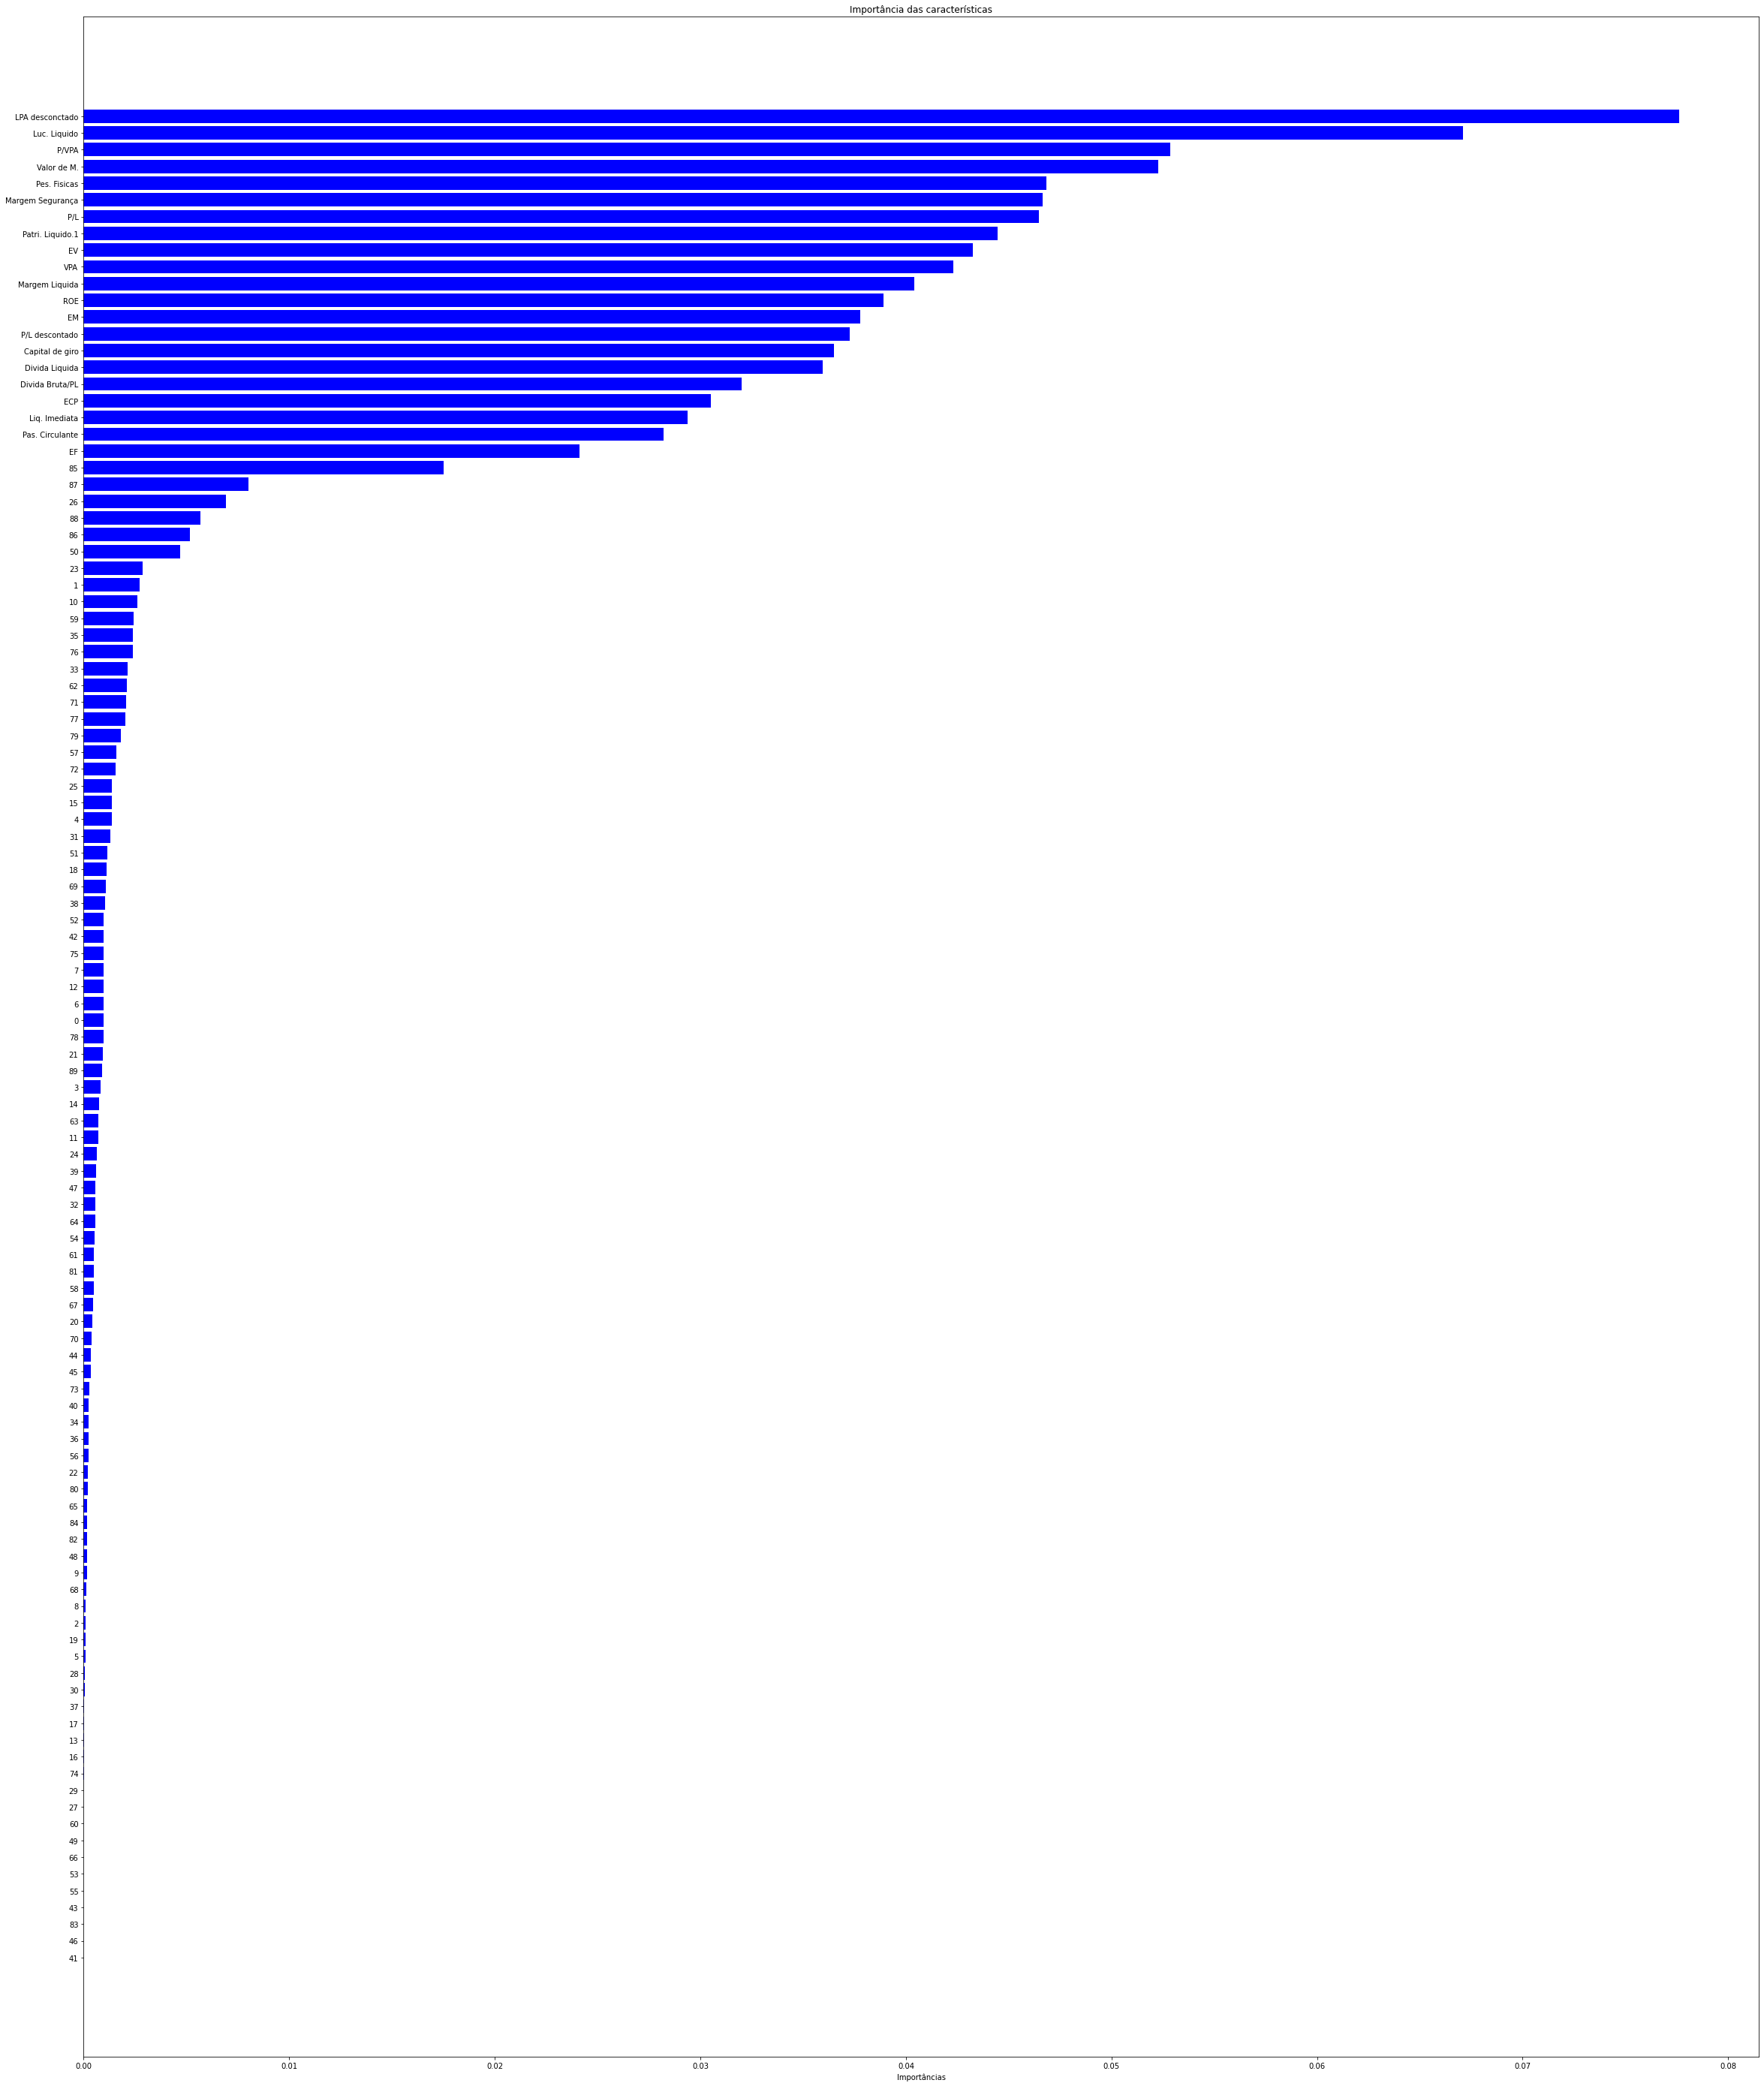

In [ ]:
plt.figure(figsize=(40,50))
plt.title('Importância das características')
plt.barh(range(len(indices)), importancias[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')
plt.show();

#No grafico mostra que o lucro por ação é o mais importante 



Os dados ordenados estão no grafíco das caracteristicas mais importante 

VAMOS SALVAR 

- Para naõ precisar fazer todo o preocessamneto de dados novamenteo , vamos salvar em formato pkl

In [ ]:
import pickle

In [ ]:
with open('bases_classificacao.pkl', 'wb') as f:
  pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

-------------------

AGRUPAMENTO DE EMPRESAS SIMILARES
- Segmentação de Mercado
- Encontrar grupos de clientes que irão comprar um produto(Mala Direta)
- Agrupamento de Documentos / Notícias

- Perfis de clientes(Netflix)
- Análise de redes Sociais 


In [2]:
import pickle
with open('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/EI.EXPERT/Python paraFinanças:AnálisedeDadoseMachineLearning/Bases de Dados/bases_classificacao.pkl', 'rb') as f:
  dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [3]:
dataset.head()

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.0,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,0.0648,20.66,2012.0,1567.00,0.860000,49.000000,11.000000,3.94,4508.0,0.12,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.0,0.18,0.80,14.92,14.92,3.39,22.00,703.0,34.6900,37.00,1812.0,2459.00,1.720000,58.000000,15.000000,2.40,828.0,0.70,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.0,0.15,2.07,31.55,31.55,2.42,-63.00,13.0,38.1500,25.00,48.0,-8.00,1.720811,30.548746,38.872065,1.24,8.0,1.13,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.0,0.20,1.23,21.69,21.69,3.61,46.00,17.0,56.0000,22.00,78.0,-31.00,0.040000,5.250000,23.000000,1.15,7.0,6.00,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.0,0.60,10.42,5.65,5.65,0.32,116.00,45.0,157.4500,6.00,721.0,-440.75,0.250000,30.548746,38.872065,1.01,6.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
dataset_original
#Temos o dataset Integro , sem o Dummy

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [5]:
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
y
#Classes para cada um dos registros

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [7]:
empresa

#Os nomes das empresas 

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [8]:
scaler
#Colocar os datos na aixa entre 0  e 1

MinMaxScaler(copy=True, feature_range=(0, 1))

AGRUPAMENTO COM K-MEANS

OBTENCÇÃO DO NÚMERO DE CLUISTERS



In [10]:
from sklearn.cluster import KMeans

In [14]:
WCSS = []#calculo em cada um dos pont0s e o sentroides
faixa = range (1,21)
for i in faixa:
  #print(i)
  #fazer o agrupamento 
  Kmeans = KMeans(n_clusters=i)
  Kmeans.fit(X)
  WCSS.append(Kmeans.inertia_)#inertia onde teremos o valor do WCSS
  


In [15]:
print(WCSS)
#Temos uma lista com 20 valores

#O valor de 549 e o WCSS é quando temos um clusters, 447 é quando temos 4 clusteres e assim por diante

[549.5537304637769, 447.0755844180393, 406.3726830716314, 382.2055626357636, 368.9191843992618, 344.3927361310964, 331.91037433842064, 319.6214213382817, 312.1560349409722, 302.54466519948187, 292.84910173519796, 288.4119031393748, 275.0777950704878, 272.1032247592411, 260.4200629465609, 259.9344499201102, 256.47690098270766, 248.94615268325398, 245.25203115457109, 242.75784974995932]


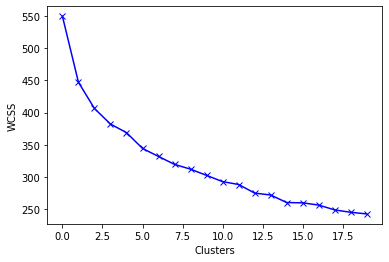

In [16]:
import matplotlib.pyplot as plt
plt.plot(WCSS, 'bx-')
plt.xlabel('Clusters')
plt.ylabel("WCSS");

#Representação grafica do WCSS mostrando cada um dos Clusters

cada x é um cluster que temos 

AGRUPAMENTO COM H-MEANS

In [ ]:
#vamos fazer um agrupamento com 7 Clusters 

In [27]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
#Criar um variavel

labels = kmeans.labels_
labels, len(labels)

(array([4, 2, 4, 4, 3, 5, 5, 5, 3, 4, 5, 2, 6, 3, 5, 5, 3, 5, 6, 1, 0, 6,
        1, 3, 5, 5, 3, 3, 3, 2, 3, 5, 5, 5, 5, 2, 5, 1, 2, 2, 2, 2, 5, 3,
        0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 3, 5, 6, 5, 5, 5, 2, 5, 5, 5, 0, 2,
        5, 5, 6, 4, 2, 4, 6, 4, 0, 6, 2, 4, 2, 5, 4, 4, 2, 4, 3, 3, 2, 4,
        4, 3, 6, 3, 1, 2, 6, 6, 0, 4, 6, 3, 5, 1, 3, 5, 6, 6, 3, 5, 5, 0,
        5, 0, 6, 6, 5, 5, 3, 5, 4, 4, 0, 5, 3, 2, 0, 5, 6, 1, 3, 6, 5, 3,
        0, 6, 3, 5, 5, 2, 5, 4, 2, 2, 0, 0, 2, 4, 5, 4, 4, 5, 6, 1, 1, 1,
        0, 0, 0, 3, 3, 4, 3, 2, 5, 5, 6, 6, 0, 5, 1, 5, 3, 0, 5, 5, 5, 5,
        0, 3, 3, 5, 5, 5, 0, 5, 6, 1, 6, 5, 3, 6, 0, 0, 5, 3, 5, 5, 3, 3,
        0, 5, 5, 5, 0, 0, 1, 5, 6, 5, 5, 1, 4, 3, 5, 2, 5, 3, 5, 0, 5, 3,
        1, 5, 5, 2, 5, 6, 5, 2, 5, 5, 5, 5, 0, 0, 0, 5, 0, 5, 5, 6, 5, 5,
        5, 2, 5, 0, 3, 1, 6, 2, 2, 5, 6, 0, 2, 0, 5, 5, 5, 2, 3, 0, 0, 5,
        1, 0, 5, 3, 2, 5, 0, 5, 0, 3, 3, 1, 5, 0, 4, 5, 4, 5, 5, 6, 0, 0,
        5, 5, 5, 0, 5, 5, 1, 5, 5, 5, 

In [29]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([ 50,  20,  36,  48,  25, 127,  41]))

In [30]:
kmeans.cluster_centers_
#Temos a media de ada um dos grupos
#O primeiro vetor indica a media de todos os atributos do primeiro clusters 
#O segundo  vetor indica a media de todos os atributos do segundo clusters 

array([[ 3.66045659e-03,  3.75980830e-03,  2.20091742e-03,
         7.97551000e-01,  1.99001795e-01,  4.93257751e-01,
         2.49414815e-01,  4.08653524e-01,  8.68087136e-01,
         1.25096787e-01,  4.86701514e-01,  6.24622264e-02,
         1.87772997e-02,  4.54620496e-02,  3.59595390e-02,
         6.32417004e-01,  5.59200000e-01,  2.20636608e-02,
         1.86199406e-02,  9.63166632e-03,  3.47977269e-01,
         4.33680869e-18,  6.00000000e-02,  8.67361738e-18,
         4.00000000e-02,  4.33680869e-18,  2.16840434e-18,
         2.00000000e-02,  6.00000000e-02,  2.00000000e-02,
         3.46944695e-18,  8.32667268e-17,  2.16840434e-18,
         4.33680869e-18,  4.33680869e-18,  4.00000000e-02,
         6.93889390e-18,  2.16840434e-18,  2.16840434e-18,
         4.00000000e-02,  4.33680869e-18,  8.67361738e-18,
         2.16840434e-18,  3.46944695e-18,  3.20000000e-01,
         8.67361738e-18,  2.00000000e-02, -1.38777878e-17,
         2.16840434e-18,  2.16840434e-18,  2.16840434e-1

In [32]:
#Criar um dataframe para ter uma melhor visualização dos dados. 

import pandas as pd
centroides = pd.DataFrame(data = Kmeans.cluster_centers_, columns = [dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.025021,0.017104,0.002969,0.824792,0.204786,0.507755,0.256587,0.392171,0.883789,0.130006,0.488555,0.059454,0.019625,0.048499,0.023491,0.628261,0.436434,0.006161,0.023427,0.035498,0.350047,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,-1.387779e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,-1.734723e-18,0.000000e+00,0.000000e+00,-1.734723e-18,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-1.387779e-17,0.000000e+00,-2.775558e-17,0.000000e+00
1,0.032454,0.023217,0.004230,0.830409,0.204291,0.533208,0.291239,0.401803,0.886554,0.127548,0.487222,0.068510,0.022234,0.057416,0.027229,0.637102,0.213077,0.002470,0.048026,0.015254,0.332673,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,1.538462e-01,-1.387779e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.692308e-02,-1.734723e-18,-1.734723e-18,0.000000e+00,0.000000e+00,-1.734723e-18,3.469447e-18,0.000000e+00,2.307692e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-1.387779e-17,0.000000e+00,-2.775558e-17,0.000000e+00
2,0.047435,0.026898,0.069554,0.836120,0.204893,0.552332,0.293233,0.467265,0.890745,0.148850,0.499732,0.069364,0.028662,0.048510,0.020789,0.627746,0.379897,0.002273,0.034099,0.053606,0.349026,0.000000e+00,0.000000e+00,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,3.703704e-02,-5.204170e-18,1.851852e-01,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.040834e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,3.703704e-02,-1.040834e-17,-5.204170e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.673617e-18,-5.204170e-18,0.000000e+00,3.703704e-02,3.703704e-02,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,0.000000e+00,3.703704e-02,0.000000e+00,8.673617e-18,8.673617e-18,0.000000e+00,0.000000e+00,8.673617e-18,3.703704e-02,7.407407e-02,-5.204170e-18,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,3.703704e-02,0.000000e+00,0.0,-1.387779e-17,-8.326673e-17,1.000000e+00,0.000000e+00
3,0.026066,0.018361,0.015422,0.835151,0.204801,0.503252,0.250479,0.428092,0.888582,0.144227,0.489206,0.070848,0.029280,0.054899,0.011471,0.629665,0.236667,0.000248,0.034945,0.013916,0.344907,8.673617e-19,1.734723e-18,1.734723e-18,1.734723e-18,8.673617e-19,4.336809e-19,4.336809e-19,0.000000e+00,1.734723e-18,0.000000e+00,-1.387779e-17,4.336809e-19,8.673617e-19,8.673617e-19,1.734723e-18,0.000000e+00,4.336809e-19,4.336809e-19,8.673617e-19,...,3.469447e-18,0.000000e+00,0.000000e+00,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,0.000000,0.000000e+00,0.000000e+00,4.336809e-19,8.673617e-19,0.000000e+00,1.734723e-18,8.673617e-19,4.336809e-19,4.336809e-19,0.000000e+00,8.673617e-19,1.734723e-18,4.336809e-19,0.000000e+00,0.00

In [33]:
#Vamos fazer o processo inverso da normalização 

scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data = centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,2.056532e+21,4.261153e+21,9.662174e+09,-9245.648276,4.619612e+05,17570.365118,15294.536944,-6.397791,-8.070720e+09,1.874572e+06,1.996384e+05,4843.702864,3.649843e+08,2.522255e+08,108.623874,117431.867685,4364.338710,2.851867e+05,1.544166e+08,33.022122,5.294403e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,-1.387779e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,-1.734723e-18,0.000000e+00,0.000000e+00,-1.734723e-18,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-1.387779e-17,0.000000e+00,-2.775558e-17,0.000000e+00
1,2.667416e+21,5.788820e+21,1.376359e+10,-3988.722518,2.888825e+05,93567.858338,70734.865263,9.292866,-3.993988e+09,9.004510e+05,-1.589991e+05,5581.533445,5.894970e+08,6.385087e+08,125.908857,203322.461538,2130.769231,1.184203e+05,3.164700e+08,14.190222,-1.165888e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,1.538462e-01,-1.387779e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.692308e-02,-1.734723e-18,-1.734723e-18,0.000000e+00,0.000000e+00,-1.734723e-18,3.469447e-18,0.000000e+00,2.307692e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-1.387779e-17,0.000000e+00,-2.775558e-17,0.000000e+00
2,3.898736e+21,6.708696e+21,2.262908e+11,1356.822489,4.993994e+05,150669.158156,73925.756350,115.925174,2.184050e+09,9.343939e+06,3.206948e+06,5651.091141,1.142509e+09,2.527059e+08,96.127087,112426.274527,3798.965352,1.095156e+05,2.247241e+08,49.867357,4.298431e+07,0.000000e+00,0.000000e+00,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,3.703704e-02,-5.204170e-18,1.851852e-01,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.040834e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,3.703704e-02,-1.040834e-17,-5.204170e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.673617e-18,-5.204170e-18,0.000000e+00,3.703704e-02,3.703704e-02,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,0.000000e+00,3.703704e-02,0.000000e+00,8.673617e-18,8.673617e-18,0.000000e+00,0.000000e+00,8.673617e-18,3.703704e-02,7.407407e-02,-5.204170e-18,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,3.703704e-02,0.000000e+00,0.0,-1.387779e-17,-8.326673e-17,1.000000e+00,0.000000e+00
3,2.142414e+21,4.575214e+21,5.017657e+10,449.937067,4.672193e+05,4127.046600,5523.056933,52.115111,-1.004738e+09,7.511585e+06,3.747404e+05,5772.028889,1.195657e+09,5.294662e+08,53.040000,131072.000000,2366.666667,1.798658e+04,2.302950e+08,12.945556,2.786733e+06,8.673617e-19,1.734723e-18,1.734723e-18,1.734723e-18,8.673617e-19,4.336809e-19,4.336809e-19,0.000000e+00,1.734723e-18,0.000000e+00,-1.387779e-17,4.336809e-19,8.673617e-19,8.673617e-19,1.734723e-18,0.000000e+00,4.336809e-19,4.336809e-19,8.67

In [ ]:
#vamos fazer algumas analises, escolhendo alguns atributos. 
 #Podemos observar que o grupo 19 tem o pior valor em LPA



In [36]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster':labels})], axis= 1)
dataset_cluster

#Apreceu NaN , para não aparecer esse valor , vou criar uma novo dataframe nolugar de chamar empresa 
# vai ser chamado o dataset_original 

,Empresa,cluster
0,aes elpa s.a,4.0
1,tiet aes tiete,2.0
2,aflu afluente,4.0
3,aflu afluente t,4.0
4,rpad alfa holding,3.0
...,...,...
372,whirlpool s.a whrl,NaN
373,wilson sons ltd wson,NaN
374,wlm industria e comercia s.a sgas,NaN
375,zain participações s.a opzi,NaN


In [37]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster':labels})], axis= 1)
dataset_cluster

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,cluster
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,4.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,2.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,4.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,NaN
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,NaN
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000,NaN
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000,NaN


In [38]:
#verificar quantas empresas do grupo alerta estão no grupo zero , quantos do alerta estão no grupo zero ou grupo 1


categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster






Categoria                 cluster
alerta                    0.0        34
                          1.0        15
                          2.0        22
                          3.0        26
                          4.0        20
                          5.0        82
                          6.0        28
crescimento               0.0         2
                          2.0         3
                          3.0         3
                          5.0         5
                          6.0         4
crescimento moderado      0.0         5
                          1.0         1
                          2.0         3
                          3.0        12
                          4.0         1
                          5.0        19
                          6.0         2
dividendos                0.0         2
                          1.0         2
                          2.0         6
                          3.0         4
                          4.0         4
      


- Temos  o  agrupamento do grupo ALERTA 34 empresas estão no grupo 0 e 20 estão no grupo 4
     - Essas que estão no 0 e no 4 tem um LPA maior, por isso da escolha de estudo. 

- Temos na empresa de crescimento 3  nas empresas ruins   e não aparece nenhum nas empresas boas.

-  Crescimneto moderado 8 nas empresas ruis e 3 nas empresas boas. 

Situacão 

In [39]:
#Criar um dataset mais um filtro para saber onde cada empresa esta. 

situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0         9
          1.0         4
          2.0        13
          3.0        16
          4.0         6
          5.0        27
          6.0         6
medio     0.0        11
          1.0         6
          2.0         4
          3.0        12
          4.0         8
          5.0        29
          6.0        10
ruim      0.0        24
          1.0         8
          2.0        17
          3.0        17
          4.0        11
          5.0        61
          6.0        21
Name: cluster, dtype: int64

In [41]:
pd.set_option('max_rows', None)# Comando para ter uma melhor visualização para os dados. 

segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster


#TEmos o segmento de cada empresa.

Segmento                                    cluster
acessorios                                  0.0         1
                                            5.0         1
agricultura                                 2.0         1
                                            5.0         3
agua e saneamento                           4.0         1
                                            5.0         1
                                            6.0         2
alimentos                                   2.0         1
                                            5.0         3
aluguel de carros                           5.0         1
                                            6.0         1
armas e munições                            3.0         1
artefatos de cobre                          5.0         1
artefatos de ferro e aço                    2.0         1
                                            4.0         1
                                            5.0         2
                    

VISUALIZAÇÃO

In [43]:
from sklearn.decomposition import PCA  

In [45]:
pca = PCA(n_components=2)#dois, porque queremoso eixo X e o eixo Y
componentes = pca.fit_transform(X)
componentes

#Geramos duas colunas, 

array([[-2.75371422e-01,  5.45708241e-01],
       [ 8.19667857e-01,  1.17432516e+00],
       [-2.98875193e-01,  5.07039457e-01],
       [-2.81480235e-01,  5.27281643e-01],
       [ 1.03169003e+00, -6.60007139e-01],
       [-3.38568275e-01, -4.16567599e-02],
       [-3.56719192e-01, -4.07534059e-02],
       [-3.50335694e-01, -3.52772437e-02],
       [ 9.04650247e-01, -5.93812854e-01],
       [-2.77094853e-01,  5.41610842e-01],
       [-3.51329011e-01, -2.13270615e-02],
       [ 7.34019349e-01,  5.33231467e-01],
       [-3.93265749e-01, -9.82878477e-02],
       [ 9.74965061e-01, -5.77750140e-01],
       [-3.99552366e-01, -8.86833694e-02],
       [-3.31532656e-01,  2.69588699e-03],
       [ 9.81654300e-01,  4.93061319e-02],
       [-3.30136442e-01, -8.20708565e-04],
       [-4.19271180e-01, -1.43930390e-01],
       [ 6.96558632e-01, -6.54634058e-02],
       [-3.74519572e-01, -7.67006641e-02],
       [-4.00633449e-01, -9.19771574e-02],
       [ 5.66626220e-01,  4.34593995e-02],
       [ 1.

In [46]:
pca_df  = pd.DataFrame(data = componentes, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.275371,0.545708
1,0.819668,1.174325
2,-0.298875,0.507039
3,-0.281480,0.527282
4,1.031690,-0.660007


In [48]:
#Adionar uma nova coluna

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.275371,0.545708,4
1,0.819668,1.174325,2
2,-0.298875,0.507039,4
3,-0.281480,0.527282,4
4,1.031690,-0.660007,3


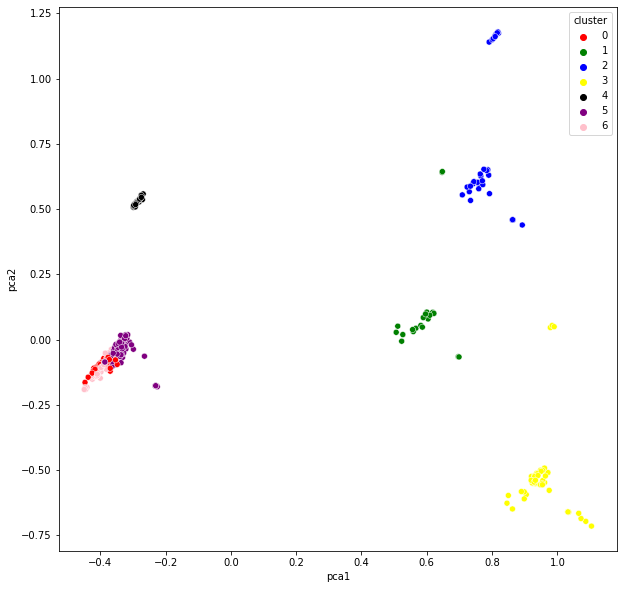

In [52]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette=['red','green', 'blue', 'yellow', 'black','purple', 'pink']);

Observamos que o grupo 0, 5 e 6 estão muito parecido com os valores dentro do LPA

Resumo;

Foi feito o pre processamento do dados, Trabalhei com a obtenção do número de clusters utilizando 
a tecníca do cotovelo (WCSS). Foi feito o agrupamento como K-Means, foi feita várias analises do dados. 
Feito a tabela dos centroides para tentanr identificar os grupos similares e com isso agrupa-los.
No fim foi feito a Representação grafíca utilizando a tecnica PCA. 


Clauder Noronha 